In [1]:
import csv
import pandas as pd
import jieba

In [2]:
df_news = pd.read_csv('data/result_Weibo_hot_1h.csv', encoding='utf-8').dropna() #ËØªÂèñÊï∞ÊçÆÈõÜ1ÔºåÂπ∂ÂéªÈô§Á©∫ÂÄº
df_news

content
0      „Äê<a target=\"_blank\" render=\"ext\" suda-uatr...
1      Êò®Â§©ÁöÑÂá†‰πéÊâÄÊúâËàÜËÆ∫ÈíßÊ≠£Âπ≥ÔºåÊúÄÈ´òÊ£ÄÔºåÂçäÊúàË∞à„ÄÅ‰∫∫Ê∞ëÁΩë„ÄÅ‰∫∫Ê∞ëÊó•Êä•„ÄÅÂÖâÊòéÊó•Êä•„ÄÅÁû≠Êúõ„ÄÅÊñ∞ÂçéÁΩë„ÄÅÁéØÁêÉÁΩë„ÄÅ...
2      „Äê<a target=\"_blank\" render=\"ext\" suda-uatr...
3      ‚Äú‰π∞ÂåÖÊ∑∑ÂÖ•Ë¥µÂ¶áÂúàÊúÄÁªàÈÄÜË¢≠‚ÄùÁöÑÂèØË°åÊÄßÁâàÊú¨ÔºåÊàëËßâÂæóÂ§ßÊ¶ÇÂ∫îËØ•ÊòØËøôÊ†∑ÁöÑÔºö<br><br>È°æ‰Ω≥Á†∏ÈîÖÂçñÈìÅ...
4      <a suda-uatrack=\"key=tblog_card&amp;value=cli...
...                                                  ...
18424  Âá†‰∏™ÊúàÊù•Á¨¨‰∏ÄÊ¨°Ë¢´‰º§Âà∞„ÄÇÊàëËßâÂæó‰πüÂ∫îËØ•Ë¢´‰º§„ÄêÂ§ßË¥¶Êà∑„ÄëÂ∞èË¥¶Êà∑ËøòÊòØÁ∫¢ÁöÑ„ÄÇÊ≤°‰ªÄ‰πàÂ•ΩË¥£Â§áËá™Â∑±ÁöÑ„ÄÇÂ∏ÇÂú∫ÈáåÈù¢...
18425  <a target="_blank" render="ext" suda-uatrack="...
18426  <a target="_blank" render="ext" suda-uatrack="...
18427  Â∞èÁôΩÂøÖÂ§áÔΩúËΩØÂà∞‰∏çÁü•ÊâÄÊé™ÔΩúÊó†Ê≤πÁâõ‰π≥ÂìàÊñØÈù¢ÂåÖ<br>Â¶ÇÊûú‰Ω†ÈóÆÊàëÂ∞èÁôΩÂøÖÂÅöÁöÑÈù¢ÂåÖÔºåÂìàÊñØÈù¢ÂåÖ‰∏ÄÂÆöË¶ÅÊã•Êúâ...
18428  <a target="_blank" render="ext" suda-uatrack="...

[18423 rows x 1 columns]

In [2]:
content = df_news.content.values.tolist()
content[0]

'„Äê<a target=\\"_blank\\" render=\\"ext\\" suda-uatrack=\\"key=topic_click&amp;value=click_topic\\" class=\\"a_topic\\" extra-data=\\"type=topic\\" href=\\"//s.weibo.com/weibo?q=%23%E5%88%AB%E5%A2%85%E8%A2%AB%E4%BE%B5%E5%8D%A0%E6%8B%8D%E5%89%A7%E6%88%BF%E4%B8%BB%E7%B4%A2%E8%B5%94300%E4%B8%87%23&amp;from=default\\">#Âà´Â¢ÖË¢´‰æµÂç†ÊãçÂâßÊàø‰∏ªÁ¥¢Ëµî300‰∏á#</a>„Äë2019Âπ¥9ÊúàÂ∫ïÔºåÊûóÂ•≥Â£´ÁúãÁîµËßÜÂâßÊó∂Êó†ÊÑèÈó¥ÂèëÁé∞Ëá™ÂÆ∂‰Ωç‰∫éÂÆÅÊ≥¢ÊÖàÊ∫™ÁöÑÂà´Â¢ÖÂá∫Áé∞Âú®‰∫ÜËØ•ÁîµËßÜÂâßÈáå„ÄÇÊûóÂ•≥Â£´‰∫éÊòØÂ∞ÜÂà´Â¢ÖÂâçÂêéÊúüÁöÑ‰∏§‰∏™Áâ©‰∏öÂÖ¨Âè∏„ÄÅÂºÄÂèëÂïÜÂÆÅÊ≥¢Áõ∏ÂéüÂíåÊôØÊàøÂú∞‰∫ßÂºÄÂèëÊúâÈôêÂÖ¨Âè∏„ÄÅÁîµËßÜÂâßÂá∫ÂìÅÊñπÁà±Â•áËâ∫Âπ≥Âè∞Âëä‰∏äÊ≥ïÂ∫≠„ÄÇËÆ∞ËÄÖ‰∫ÜËß£Âà∞ÔºåÁõÆÂâçÊûóÂ•≥Â£´ÁöÑÁöÑËØâÊ±ÇÊúâËøôÂá†ÁÇπÔºå‰∏ÄÊòØÁîµËßÜÂâß‰∏ãÊû∂ÔºåÊàñËÄÖÂ∞ÜÁîµËßÜÂâß‰∏≠Ê∂âÂèäÂà∞ÂÖ∂Âà´Â¢ÖÁöÑÈïúÂ§¥Âà†Èô§Ôºõ‰∫åÊòØËµîÁ§ºÈÅìÊ≠âÔºõ‰∏âÊòØËµîÂÅøÊçüÂ§±ÔºåÁõÆÂâçÈ¢Ñ‰º∞‰∏∫300‰∏áÔºåÂåÖÊã¨Ë¥¢‰∫ßÊçüÂ§±Âíå‰æµÁäØÈöêÁßÅÊùÉ„ÄÇ7Êúà21Êó•‰∏äÂçàÔºåÁ¥´ÁâõÊñ∞ÈóªËÅîÁ≥ª‰∏äÊûóÂ•≥Â£´ÔºàÂåñÂêçÔºâÁöÑ‰ª£ÁêÜÂæãÂ∏àÁéãÂã§‰øù‰∫ÜËß£ÊÉÖÂÜµÔºå‰ªñËØ¥Ôºå

In [3]:
content_all_segment = []
for content_each in content:
    try:
        content_each_segment = jieba.lcut(content_each)
        if len(content_each_segment) > 1 and content_each_segment != '\r\n':
            content_all_segment.append(content_each_segment)
        else:
            print(content_each_segment)
    except:
        print(content_each, ' fail to cut')
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\11578\AppData\Local\Temp\jieba.cache
Loading model cost 1.384 seconds.
Prefix dict has been built successfully.


In [4]:
df_content=pd.DataFrame({'content_all_segment':content_all_segment})
df_content

content_all_segment
0      [„Äê, <, a,  , target, =, \, ", _, blank, \, ", ...
1      [Êò®Â§©, ÁöÑ, Âá†‰πé, ÊâÄÊúâ, ËàÜËÆ∫, Èíß, Ê≠£Âπ≥, Ôºå, ÊúÄÈ´òÊ£Ä, Ôºå, ÂçäÊúàË∞à, „ÄÅ, ...
2      [„Äê, <, a,  , target, =, \, ", _, blank, \, ", ...
3      [‚Äú, ‰π∞ÂåÖ, Ê∑∑ÂÖ•, Ë¥µÂ¶á, Âúà, ÊúÄÁªà, ÈÄÜË¢≠, ‚Äù, ÁöÑ, ÂèØË°åÊÄß, ÁâàÊú¨, Ôºå, Êàë...
4      [<, a,  , suda, -, uatrack, =, \, ", key, =, t...
...                                                  ...
18418  [Âá†‰∏™, Êúà, Êù•, Á¨¨‰∏ÄÊ¨°, Ë¢´, ‰º§Âà∞, „ÄÇ, Êàë, ËßâÂæó, ‰πü, Â∫îËØ•, Ë¢´, ‰º§, ...
18419  [<, a,  , target, =, ", _, blank, ",  , render...
18420  [<, a,  , target, =, ", _, blank, ",  , render...
18421  [Â∞èÁôΩ, ÂøÖÂ§á, ÔΩú, ËΩØÂà∞, ‰∏çÁü•ÊâÄÊé™, ÔΩú, Êó†Ê≤π, Áâõ‰π≥, ÂìàÊñØ, Èù¢ÂåÖ, <, br...
18422  [<, a,  , target, =, ", _, blank, ",  , render...

[18423 rows x 1 columns]

In [5]:
stopwords = pd.read_csv("data/data_stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords = stopwords.append(pd.read_csv("data/data_stopwords_Weibo.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8'))
stopwords

stopword
0         !
1         "
2         #
3         $
4         %
..      ...
31        ÈóÆ
32       ÁΩëÈ°µ
33        ‰∏≠
34       ÊêûÁ¨ë
35       ÂìàÊ¨†

[5138 rows x 1 columns]

In [6]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords or not '\u4e00' <= word <= '\u9fff':
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words

stopwords = stopwords.stopword.values.tolist()
contents_all_segment_clean, contents_all_words = drop_stopwords(content_all_segment,stopwords)

In [7]:
df_contents_all_segment_clean=pd.DataFrame({'contents_all_segment_clean':contents_all_segment_clean})
df_contents_all_segment_clean

contents_all_segment_clean
0      [Âà´Â¢Ö, ‰æµÂç†, ÊãçÂâß, Êàø‰∏ª, Á¥¢Ëµî, ‰∏á, ÊúàÂ∫ï, Êûó, Â•≥Â£´, ÁîµËßÜÂâß, Êó†ÊÑèÈó¥, Âèë...
1      [Êò®Â§©, ËàÜËÆ∫, Èíß, Ê≠£Âπ≥, ÊúÄÈ´òÊ£Ä, ÂçäÊúàË∞à, ‰∫∫Ê∞ëÁΩë, ‰∫∫Ê∞ëÊó•Êä•, ÂÖâÊòéÊó•Êä•, Áû≠Êúõ,...
2      [ÁæéÂõΩ, Êñ∞ÂÜ†, ËÇ∫ÁÇé, Á°ÆËØä, Ë∂Ö, ‰∏á‰æã, ÁâπÊúóÊôÆ, ÂëºÂêÅ, ÁæéÂõΩ, Êà¥, Âè£ÁΩ©, ÁæéÂõΩ...
3      [‰π∞ÂåÖ, Ê∑∑ÂÖ•, Ë¥µÂ¶á, Âúà, ÊúÄÁªà, ÈÄÜË¢≠, ÂèØË°åÊÄß, ÁâàÊú¨, È°æ‰Ω≥, Á†∏ÈîÖÂçñÈìÅ, ‰π∞, ...
4      [Â±±Áå´, ÁßëÊôÆ, Â±±Áå´, ÁßëÊôÆ, Â±±Áå´, ÁßëÊôÆ, Âàù‰∏â, Áî∑Â≠©, ÊîæÂºÉ, ‰∏≠ËÄÉ, ÊçêÈ´ì, Êïë...
...                                                  ...
18418  [Âá†‰∏™, Á¨¨‰∏ÄÊ¨°, ‰º§Âà∞, ‰º§, Ë¥¶Êà∑, Ë¥¶Êà∑, Á∫¢, Ê≤°‰ªÄ‰πà, Ë¥£Â§á, Â∏ÇÂú∫, Ë∏èÁ©∫, Áãó...
18419  [Âçé‰∏∫, Âçé‰∏∫, Áªà‰∫é, Âá∫Êâã, Âçé‰∏∫, Âä†ÊãøÂ§ß, Ê≥ïÈô¢, Áî≥ËØ∑, ‰∏≠Ê≠¢, Â≠üÊôö, Ëàü, Âºï...
18420  [Ë¥µÂ∑û, Ë∫´Ëæπ, ‰∫ã, È´òËÄÉ, Ë¥µÂ∑û, È´òËÄÉ, ÂàÜÊï∞Á∫ø, ÂÖ¨Â∏É, ‰∏ÄÊú¨, Á∫ø, ÊñáÁßë, ÁêÜÁßë...
18421  [Â∞èÁôΩ, ÂøÖÂ§á, ËΩØÂà∞, ‰∏çÁü•ÊâÄÊé™, Êó†Ê≤π, Áâõ‰π≥, ÂìàÊñØ, Èù¢ÂåÖ, Â∞èÁôΩÂøÖ, Èù¢ÂåÖ, ÂìàÊñØ...
18422  [Áì∂, ÈÇ™, Â®±‰πêÂúà, ÂÆ¢‰∏≤, Âá†‰∏™, Áü≠Áâá, Âê¥ÈÇ™, Á£®ÁªÉ, Á£®ÁªÉ, Êé•‰∏™, Âä®‰Ωú, ÁîµÂΩ±...

[18423 rows x 1 columns]

In [8]:
df_contents_all_words=pd.DataFrame({'contents_all_words':contents_all_words})
df_contents_all_words

contents_all_words
0                      Âà´Â¢Ö
1                      ‰æµÂç†
2                      ÊãçÂâß
3                      Êàø‰∏ª
4                      Á¥¢Ëµî
...                   ...
452248                 ÁÜüÊÇâ
452249                 Âº†Ëµ∑
452250                  ÁÅµ
452251                 ÊåâÂÄí
452252                 Áù°Ëßâ

[452253 rows x 1 columns]

In [9]:
df_contents_all_words['count'] = ''
words_count = df_contents_all_words.pivot_table(['count'],index = 'contents_all_words', aggfunc = 'count').reset_index().sort_values(by = 'count', axis = 0, ascending = False)
words_count.head(10)

contents_all_words  count
3040                  ‰∏≠ÂõΩ   1700
15977                 ÂñúÊ¨¢   1282
48925                 ÁæéÂõΩ   1177
41320                  Áà±   1043
29344                  Êãç    957
32926                 Êó∂Èó¥    776
42933                 ÁîüÊ¥ª    752
31967                  Êñ∞    744
32163                 Êñ∞Èóª    697
63152                 È´òËÄÉ    672

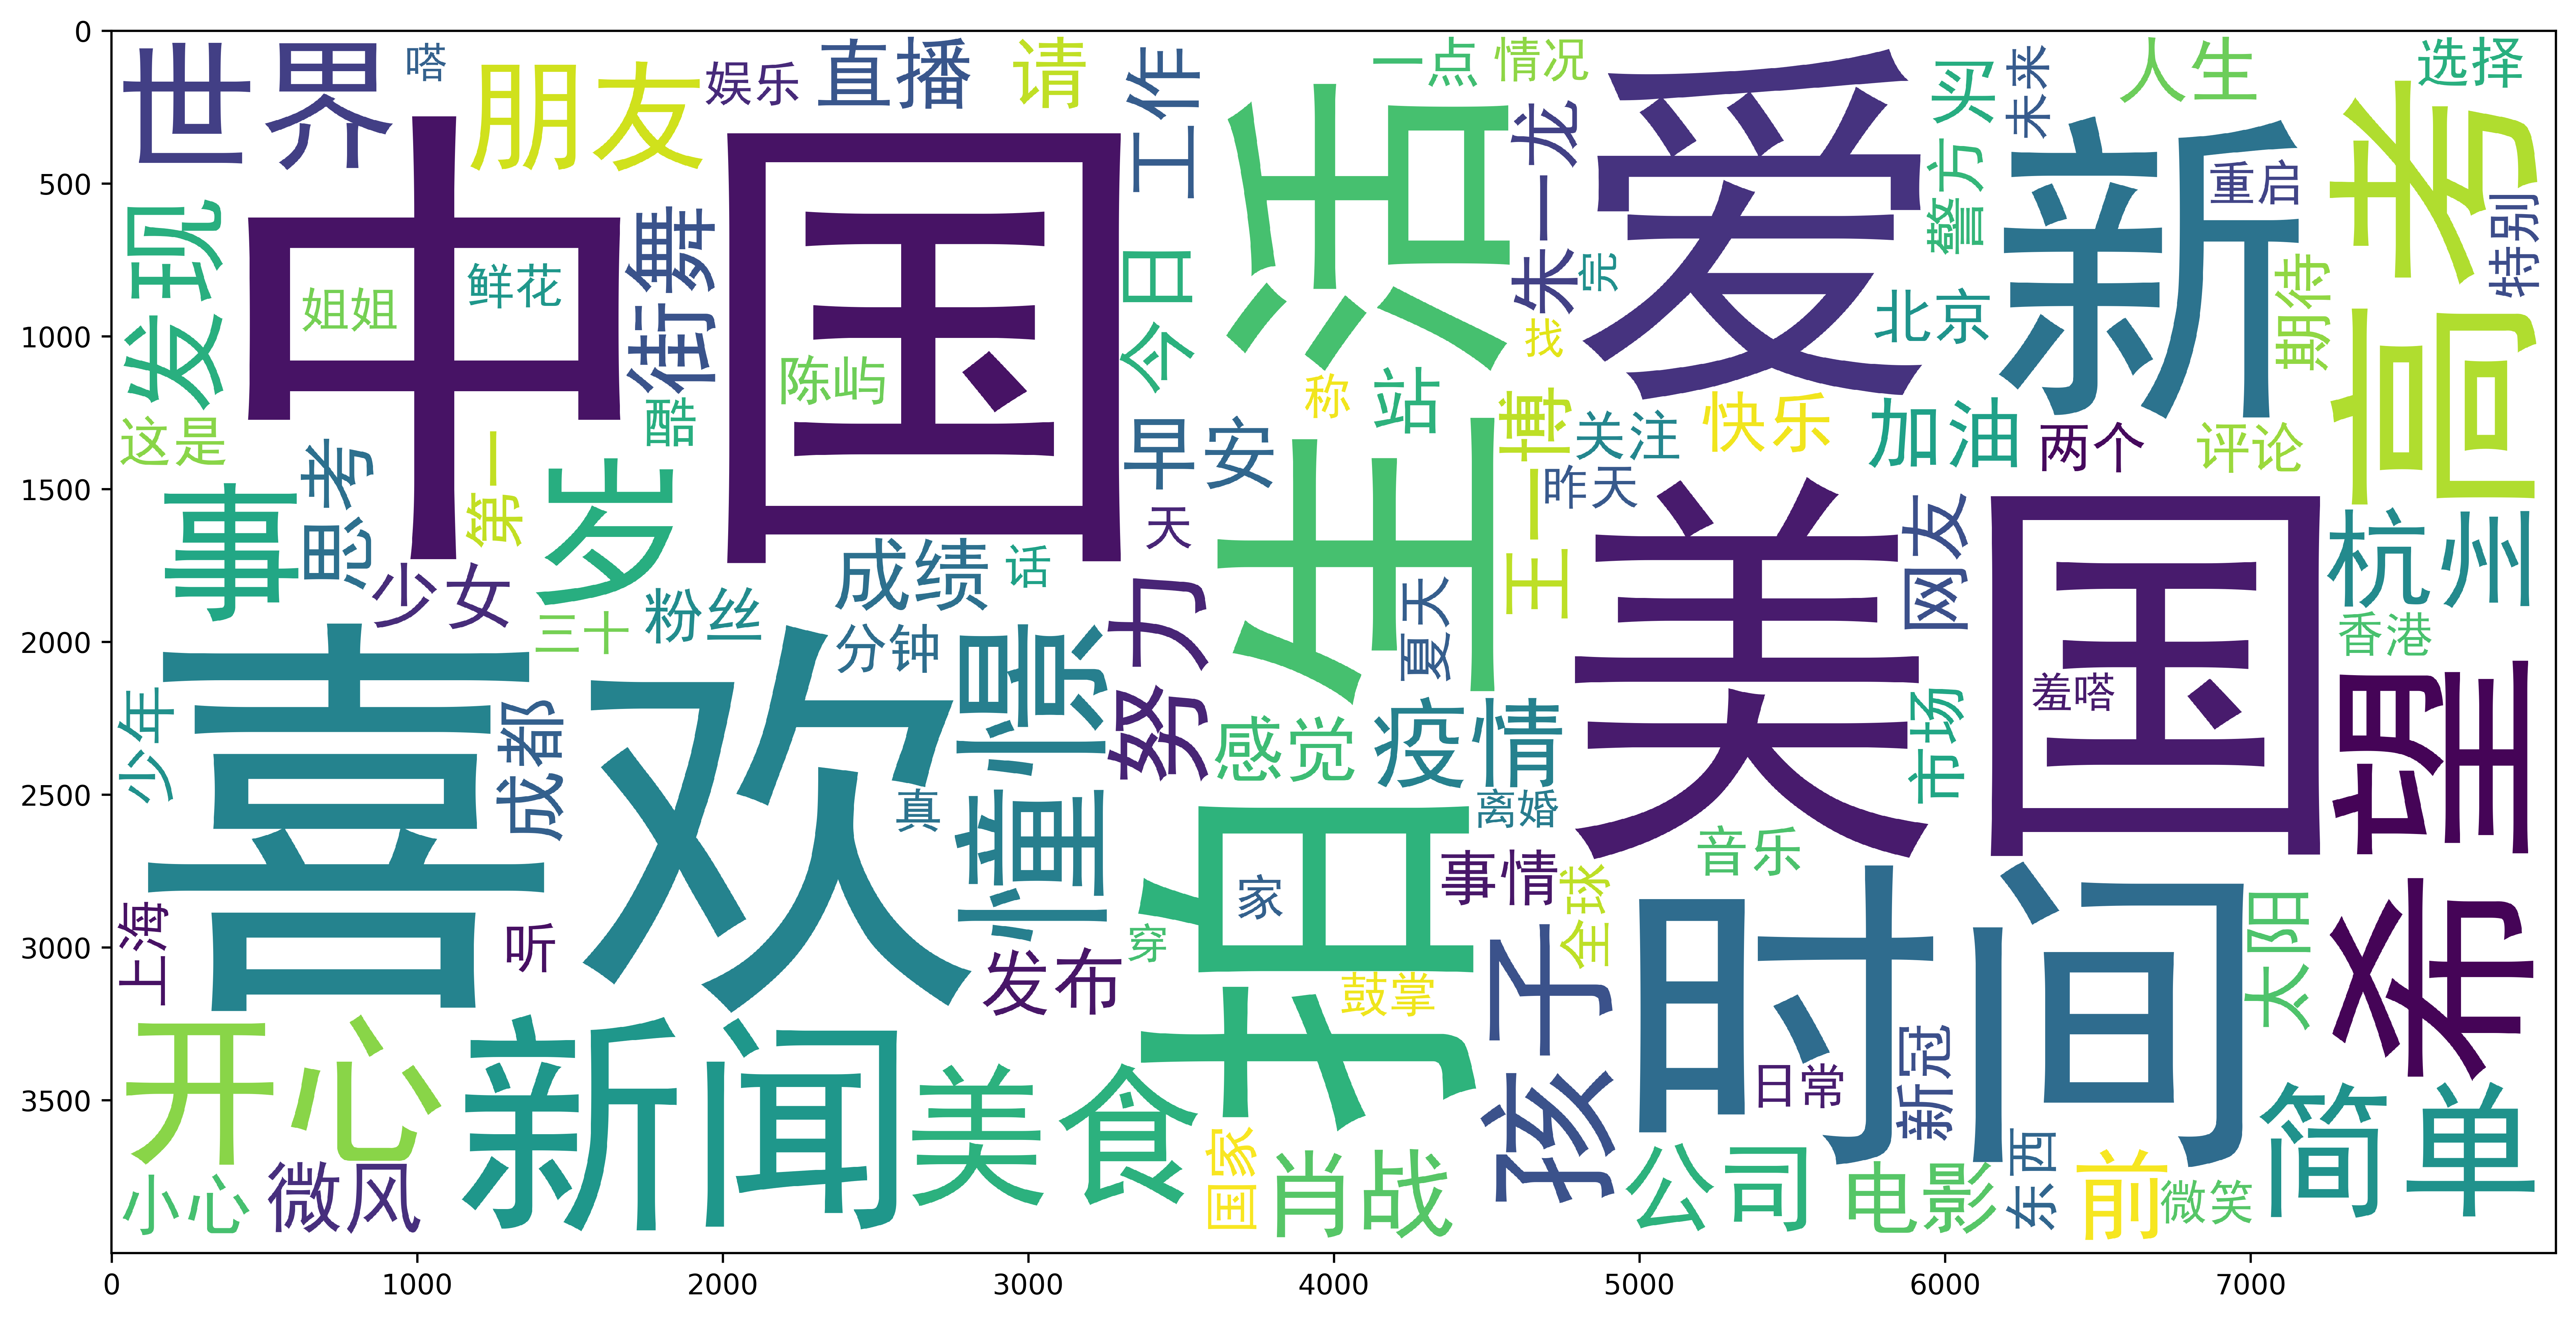

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16, 8), dpi = 600)
model_wordcloud=WordCloud(font_path=r"c:\windows\fonts\simhei.ttf",background_color="white",max_font_size=80, scale=20)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=model_wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
plt.show()

In [11]:
from gensim import corpora
import gensim

In [13]:
texts=[['ÁæéÂõΩ','‰∏≠ÂõΩ','ÂÖ≥Á≥ª','ÁæéÂõΩ'],['ÁæéÂõΩ','Áñ´ÊÉÖ','Áñ´ÊÉÖ'],['‰∏≠ÂõΩ', 'Áñ´ÊÉÖ'], ['Áñ´ÊÉÖ']]
dictionary = corpora.Dictionary(texts)
for key, value in dictionary.iteritems():
    print(key, value)

0 ‰∏≠ÂõΩ
1 ÂÖ≥Á≥ª
2 ÁæéÂõΩ
3 Áñ´ÊÉÖ


In [14]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1), (1, 1), (2, 2)], [(2, 1), (3, 2)], [(0, 1), (3, 1)], [(3, 1)]]

In [15]:
dictionary = corpora.Dictionary(contents_all_segment_clean)
corpus = [dictionary.doc2bow(contents_each_segment_clean) for contents_each_segment_clean in contents_all_segment_clean]

In [16]:
corpus[0][:5]
#Á¨¨‰∏ÄÊù°ÂæÆÂçöÁöÑÂâç‰∫î‰∏™ËØçË¢ãÊ®°Âûã

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]

In [16]:
model_lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

In [17]:
for topic in model_lda.print_topics(num_topics=5, num_words=10):
    print(topic)

(0, '0.004*"ÁîüÊ¥ª" + 0.004*"Âê¥ÈÇ™" + 0.004*"Âº†Ëµ∑" + 0.004*"ÂñúÊ¨¢" + 0.004*"ÁÅµ" + 0.003*"‰∫ã" + 0.003*"Âä™Âäõ" + 0.003*"Â∑•‰Ωú" + 0.003*"Â≠©Â≠ê" + 0.003*"Á¨¨‰∏Ä"')
(1, '0.005*"ÊÜßÊÜ¨" + 0.004*"ËàûÂè∞" + 0.004*"Âåó‰∫¨" + 0.004*"Êñ∞Èóª" + 0.004*"ÁæéÂõΩ" + 0.004*"ÂßêÂßê" + 0.004*"Êñ∞" + 0.004*"Áõ¥Êí≠" + 0.003*"ÂñúÊ¨¢" + 0.003*"‰∏≠ÂõΩ"')
(2, '0.007*"È´òËÄÉ" + 0.005*"Â∏ÇÂú∫" + 0.004*"ÂºÄÂøÉ" + 0.004*"ÂàÜÊï∞Á∫ø" + 0.003*"Â∑®Â∑®" + 0.003*"ÊàêÁª©" + 0.003*"Áà±" + 0.003*"ÁªôÂäõ" + 0.003*"ÂàÜÈíü" + 0.003*"Â∞ëÂπ¥"')
(3, '0.016*"ÁæéÂõΩ" + 0.015*"‰∏≠ÂõΩ" + 0.007*"È©ª" + 0.006*"ÂÖ≥Èó≠" + 0.005*"ÊàêÈÉΩ" + 0.005*"ÈÖ∑" + 0.003*"Ê∑òÊ±∞" + 0.003*"ÊÄªÈ¢Ü‰∫ãÈ¶Ü" + 0.003*"ÂßêÂßê" + 0.003*"Â≠ü‰Ω≥"')
(4, '0.008*"Êù≠Â∑û" + 0.005*"Ë≠¶Êñπ" + 0.005*"ÊàêÈÉΩ" + 0.005*"ÁæéÈ£ü" + 0.004*"Â§±Ë∏™Ê°à" + 0.004*"ÈÄöÊä•" + 0.004*"Êãç" + 0.004*"ÂæÆÈ£é" + 0.003*"‰∏àÂ§´" + 0.003*"Ê±°"')


In [18]:
df_contents_all_segment_clean

contents_all_segment_clean
0      [Âà´Â¢Ö, ‰æµÂç†, ÊãçÂâß, Êàø‰∏ª, Á¥¢Ëµî, ‰∏á, ÊúàÂ∫ï, Êûó, Â•≥Â£´, ÁîµËßÜÂâß, Êó†ÊÑèÈó¥, Âèë...
1      [Êò®Â§©, ËàÜËÆ∫, Èíß, Ê≠£Âπ≥, ÊúÄÈ´òÊ£Ä, ÂçäÊúàË∞à, ‰∫∫Ê∞ëÁΩë, ‰∫∫Ê∞ëÊó•Êä•, ÂÖâÊòéÊó•Êä•, Áû≠Êúõ,...
2      [ÁæéÂõΩ, Êñ∞ÂÜ†, ËÇ∫ÁÇé, Á°ÆËØä, Ë∂Ö, ‰∏á‰æã, ÁâπÊúóÊôÆ, ÂëºÂêÅ, ÁæéÂõΩ, Êà¥, Âè£ÁΩ©, ÁæéÂõΩ...
3      [‰π∞ÂåÖ, Ê∑∑ÂÖ•, Ë¥µÂ¶á, Âúà, ÊúÄÁªà, ÈÄÜË¢≠, ÂèØË°åÊÄß, ÁâàÊú¨, È°æ‰Ω≥, Á†∏ÈîÖÂçñÈìÅ, ‰π∞, ...
4      [Â±±Áå´, ÁßëÊôÆ, Â±±Áå´, ÁßëÊôÆ, Â±±Áå´, ÁßëÊôÆ, Âàù‰∏â, Áî∑Â≠©, ÊîæÂºÉ, ‰∏≠ËÄÉ, ÊçêÈ´ì, Êïë...
...                                                  ...
18418  [Âá†‰∏™, Á¨¨‰∏ÄÊ¨°, ‰º§Âà∞, ‰º§, Ë¥¶Êà∑, Ë¥¶Êà∑, Á∫¢, Ê≤°‰ªÄ‰πà, Ë¥£Â§á, Â∏ÇÂú∫, Ë∏èÁ©∫, Áãó...
18419  [Âçé‰∏∫, Âçé‰∏∫, Áªà‰∫é, Âá∫Êâã, Âçé‰∏∫, Âä†ÊãøÂ§ß, Ê≥ïÈô¢, Áî≥ËØ∑, ‰∏≠Ê≠¢, Â≠üÊôö, Ëàü, Âºï...
18420  [Ë¥µÂ∑û, Ë∫´Ëæπ, ‰∫ã, È´òËÄÉ, Ë¥µÂ∑û, È´òËÄÉ, ÂàÜÊï∞Á∫ø, ÂÖ¨Â∏É, ‰∏ÄÊú¨, Á∫ø, ÊñáÁßë, ÁêÜÁßë...
18421  [Â∞èÁôΩ, ÂøÖÂ§á, ËΩØÂà∞, ‰∏çÁü•ÊâÄÊé™, Êó†Ê≤π, Áâõ‰π≥, ÂìàÊñØ, Èù¢ÂåÖ, Â∞èÁôΩÂøÖ, Èù¢ÂåÖ, ÂìàÊñØ...
18422  [Áì∂, ÈÇ™, Â®±‰πêÂúà, ÂÆ¢‰∏≤, Âá†‰∏™, Áü≠Áâá, Âê¥ÈÇ™, Á£®ÁªÉ, Á£®ÁªÉ, Êé•‰∏™, Âä®‰Ωú, ÁîµÂΩ±...

[18423 rows x 1 columns]

In [19]:
news_topics = model_lda.get_document_topics(corpus[:5])
for topic in news_topics:
    print(topic)
for i in range(len(news_topics)):
    print('Á¨¨{}Êù°ÂçöÊñáÂ§ßÊ¶ÇÁéáÁ±ªÂà´‰∏∫Ôºö'.format(i), max(news_topics[i], key = lambda x: x[1])[0])

[(0, 0.27705988), (1, 0.18118459), (3, 0.22090727), (4, 0.31811753)]
[(0, 0.083242536), (1, 0.34673923), (2, 0.40384525), (3, 0.16389051)]
[(1, 0.99295604)]
[(0, 0.9422411), (1, 0.032344054), (2, 0.010823464), (3, 0.013928126)]
[(0, 0.06480118), (1, 0.16116938), (2, 0.42731264), (3, 0.010121678), (4, 0.33659515)]
Á¨¨0Êù°ÂçöÊñáÂ§ßÊ¶ÇÁéáÁ±ªÂà´‰∏∫Ôºö 4
Á¨¨1Êù°ÂçöÊñáÂ§ßÊ¶ÇÁéáÁ±ªÂà´‰∏∫Ôºö 2
Á¨¨2Êù°ÂçöÊñáÂ§ßÊ¶ÇÁéáÁ±ªÂà´‰∏∫Ôºö 1
Á¨¨3Êù°ÂçöÊñáÂ§ßÊ¶ÇÁéáÁ±ªÂà´‰∏∫Ôºö 0
Á¨¨4Êù°ÂçöÊñáÂ§ßÊ¶ÇÁéáÁ±ªÂà´‰∏∫Ôºö 2


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["ÁæéÂõΩ ‰∏≠ÂõΩ ÂÖ≥Á≥ª","ÁæéÂõΩ Áñ´ÊÉÖ","‰∏≠ÂõΩ Áñ´ÊÉÖ ‰∏≠ÂõΩ", "Áñ´ÊÉÖ"]
model_cv = CountVectorizer()
model_cv_fit=model_cv.fit_transform(texts)

print(model_cv.get_feature_names())
print(model_cv_fit.toarray())

print(model_cv_fit.toarray().sum(axis=0))

['‰∏≠ÂõΩ', 'ÂÖ≥Á≥ª', 'Áñ´ÊÉÖ', 'ÁæéÂõΩ']
[[1 1 0 1]
 [0 0 1 1]
 [2 0 1 0]
 [0 0 1 0]]
[3 1 3 2]


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
texts=["ÁæéÂõΩ ‰∏≠ÂõΩ ÂÖ≥Á≥ª","ÁæéÂõΩ Áñ´ÊÉÖ","‰∏≠ÂõΩ Áñ´ÊÉÖ ‰∏≠ÂõΩ", "Áñ´ÊÉÖ"]
model_tfidf = TfidfVectorizer()
model_tfidf_fit=model_tfidf.fit_transform(texts)

print(model_tfidf.get_feature_names())
print(model_tfidf_fit.toarray())

['‰∏≠ÂõΩ', 'ÂÖ≥Á≥ª', 'Áñ´ÊÉÖ', 'ÁæéÂõΩ']
[[0.52640543 0.66767854 0.         0.52640543]
 [0.         0.         0.62922751 0.77722116]
 [0.92693676 0.         0.3752176  0.        ]
 [0.         0.         1.         0.        ]]


In [22]:
df_news_train = pd.read_csv('data/result_Weibo_with_label.csv', encoding = 'utf8').dropna().drop_duplicates(['content'], keep = 'first') 
df_news_train

content label
0      ÂÖ®ÁêÉÊØèÂπ¥Áîü‰∫ßËøë1000‰∫ø‰ª∂Ë°£ÊúçÔºå‰ΩÜÊúÄÁªà85%ÁöÑÁ∫∫ÁªáÂìÅÈÉΩË¶ÅË¢´‰∏¢ÂºÉÂíåÂ°´ÂüãÔºåÂèØÊåÅÁª≠ÁöÑÊó∂Â∞öË°å‰∏öÂ∞Ü‰∏∫Âú∞...    Á§æ‰ºö
1      <a target="_blank" render="ext" suda-uatrack="...    Á§æ‰ºö
2      <a target="_blank" render="ext" suda-uatrack="...    Á§æ‰ºö
3      „Äê<a target="_blank" render="ext" suda-uatrack=...    Á§æ‰ºö
4      „Äê<a target="_blank" render="ext" suda-uatrack=...    Á§æ‰ºö
...                                                  ...   ...
16194  <a target="_blank" render="ext" suda-uatrack="...    Âä®Êº´
16195  <a target="_blank" render="ext" suda-uatrack="...    Âä®Êº´
16196  <a target="_blank" render="ext" suda-uatrack="...    Âä®Êº´
16197  <a target="_blank" render="ext" suda-uatrack="...    Âä®Êº´
16198  <a suda-uatrack="key=tblog_card&amp;value=clic...    Âä®Êº´

[16199 rows x 2 columns]

In [23]:
df_news_train.pivot_table(['content'],index = 'label', aggfunc = 'count').reset_index()

label  content
0     ‰ΩìËÇ≤      809
1     ÂÅ•Â∫∑      805
2     ÂÜõ‰∫ã      811
3     Âä®Êº´      743
4     ÂéÜÂè≤      501
5     ÂõΩÈôÖ      215
6     ÊÉÖÊÑü      881
7     ÊêûÁ¨ë      876
8     ÊóÖÊ∏∏      820
9     Êó∂Â∞ö      910
10    ÊòéÊòü      891
11    Ê†°Âõ≠      920
12    Ê±ΩËΩ¶      886
13    Ê∏∏Êàè      828
14    Á§æ‰ºö      955
15    ÁßëÊäÄ      810
16    ÁæéÈ£ü      861
17    Ëâ∫ÊúØ      852
18    Ë¥¢Áªè      986
19    Èü≥‰πê      839

In [24]:
content_train = df_news_train.content.values.tolist()
content_all_segment_train = []
for content_each in content_train:
    current_segment_train = jieba.lcut(content_each)
    if len(current_segment_train) > 1 and current_segment_train != '\r\n':
        content_all_segment_train.append(current_segment_train)
    else:
        print(current_segment_train)
contents_all_segment_clean_train, all_words_train = drop_stopwords(content_all_segment_train,stopwords)
df_train=pd.DataFrame({'contents_all_segment_clean':contents_all_segment_clean_train,'label':df_news_train['label']})
df_train

contents_all_segment_clean label
0      [ÂÖ®ÁêÉ, Áîü‰∫ß, ‰∫ø‰ª∂, Ë°£Êúç, ÊúÄÁªà, Á∫∫ÁªáÂìÅ, ‰∏¢ÂºÉ, Â°´Âüã, ÊåÅÁª≠, Êó∂Â∞ö, Ë°å‰∏ö, ...    Á§æ‰ºö
1      [Âπ∏Á¶è, ÁÅæÈöæ, ‰∏ÄÁû¨Èó¥, ÊëÑÂΩ±Â∏à, ÈªéÂ∑¥Â´©, È¶ñÈÉΩ, Ë¥ùÈ≤ÅÁâπ, ÁàÜÁÇ∏, Ââç, ‰∏ÄÂØπ, Êñ∞‰∫∫...    Á§æ‰ºö
2      [ÊπñÂçó, È´ò‰∏Ä, Êñ∞Áîü, ÂÜõËÆ≠, Ê≠ª‰∫°, ÊπñÂçó, È´ò‰∏Ä, Êñ∞Áîü, ÂÜõËÆ≠, ÊôïÂÄí, Ë∫´‰∫°, Êïô...    Á§æ‰ºö
3      [‰∏äÊµ∑, È¶ñ‰æã, ÂÖªÁä¨‰∫∫, ÈÅóÂºÉ, Áä¨, Âè™Ê°à, Ë≠¶Êñπ, ÁΩöÁãó, ‰∏ª‰∫∫, ‰∫îÁôæÂÖÉ, ÂêäÈîÄ, ...    Á§æ‰ºö
4      [Êê∫Â≠ê, Â®ÅËÉÅ, Â¶ªÂ≠ê, Âπ∂Áß∞, ÊâìËøá, Ê¨°, Ê≤°Ëøõ, ÂåªÈô¢, ÂÆ∂‰Ωè, ÂõõÂ∑ùÁúÅ, ‰πêÂ±±Â∏Ç, ...    Á§æ‰ºö
...                                                  ...   ...
16194                       [Âë®Âπ¥Á∫™Âøµ, Âä®Áîª, ÂÖ¨Â∏É, Ê∏∏Êàè, Âêõ, Ê∏∏Êàè, Âêõ]    Âä®Êº´
16195  [ÂõΩÊº´, ÂõΩ‰∫ß, Âä®Áîª, Èïñ‰∫∫, Âä®Áîª, ÁΩë‰º†, ËΩ∞Âä®, ËøáÂÖ®, Êó•Êú¨, ÂõΩ‰∫ß, Êº´Áîª, Â§ß...    Âä®Êº´
16196   [Ëã±ÈõÑ, ËÅîÁõü, ÁªΩÁÅµËäÇ, Ë∞¢ÈÇÄ, ÊàëÂá∫, ÈòøÁã∏, ÂºÄÂøÉ, ÂºÄÂøÉ, ÂºÄÂøÉ, ÂºÄÂøÉ, ÊúâÂ§ü, Âº∫]    Âä®Êº´
16197                                  [Êº´Áîª, Áæ°Áæ°Â§™, È≠îÈÅì, Á•ñÂ∏à]    Âä®Êº´
16198                                   [‰∏ëÂ®É, ‰∏ëÂ®É, ‰∏ëÂ®É, Èõ∑Á•û]    Âä®Êº´

[16199 rows x 2 columns]

In [25]:
def join_words(words):
    return ' '.join(words)
df_train.contents_all_segment_clean = df_train.contents_all_segment_clean.apply(join_words)
df_train

contents_all_segment_clean label
0      ÂÖ®ÁêÉ Áîü‰∫ß ‰∫ø‰ª∂ Ë°£Êúç ÊúÄÁªà Á∫∫ÁªáÂìÅ ‰∏¢ÂºÉ Â°´Âüã ÊåÅÁª≠ Êó∂Â∞ö Ë°å‰∏ö Âú∞ÁêÉ ÁéØÂ¢É Â∏¶Êù• Âú∞ÁêÉ ...    Á§æ‰ºö
1      Âπ∏Á¶è ÁÅæÈöæ ‰∏ÄÁû¨Èó¥ ÊëÑÂΩ±Â∏à ÈªéÂ∑¥Â´© È¶ñÈÉΩ Ë¥ùÈ≤ÅÁâπ ÁàÜÁÇ∏ Ââç ‰∏ÄÂØπ Êñ∞‰∫∫ ÊãçÊëÑ ÁæéÂ•Ω Â©öÁ§º Áîª...    Á§æ‰ºö
2      ÊπñÂçó È´ò‰∏Ä Êñ∞Áîü ÂÜõËÆ≠ Ê≠ª‰∫° ÊπñÂçó È´ò‰∏Ä Êñ∞Áîü ÂÜõËÆ≠ ÊôïÂÄí Ë∫´‰∫° ÊïôËÇ≤Â±Ä ÈÄöÊä• Á≥ªÂõ† ÊÇ£ÁÉ≠Â∞Ñ...    Á§æ‰ºö
3      ‰∏äÊµ∑ È¶ñ‰æã ÂÖªÁä¨‰∫∫ ÈÅóÂºÉ Áä¨ Âè™Ê°à Ë≠¶Êñπ ÁΩöÁãó ‰∏ª‰∫∫ ‰∫îÁôæÂÖÉ ÂêäÈîÄ Áä¨ËØÅ ‰∏äÊµ∑‰∏úÊñπ Ë∑Ø ÈæôÈò≥...    Á§æ‰ºö
4      Êê∫Â≠ê Â®ÅËÉÅ Â¶ªÂ≠ê Âπ∂Áß∞ ÊâìËøá Ê¨° Ê≤°Ëøõ ÂåªÈô¢ ÂÆ∂‰Ωè ÂõõÂ∑ùÁúÅ ‰πêÂ±±Â∏Ç ‰ΩïÂÖàÁîü Â¶ªÂ≠ê ÁéãÂ•≥Â£´ Â§ß...    Á§æ‰ºö
...                                                  ...   ...
16194                               Âë®Âπ¥Á∫™Âøµ Âä®Áîª ÂÖ¨Â∏É Ê∏∏Êàè Âêõ Ê∏∏Êàè Âêõ    Âä®Êº´
16195  ÂõΩÊº´ ÂõΩ‰∫ß Âä®Áîª Èïñ‰∫∫ Âä®Áîª ÁΩë‰º† ËΩ∞Âä® ËøáÂÖ® Êó•Êú¨ ÂõΩ‰∫ß Êº´Áîª Â§ßÂú£ ÂΩíÊù• ÂØºÊºî ÁôΩÂ§ú ËøΩ...    Âä®Êº´
16196                Ëã±ÈõÑ ËÅîÁõü ÁªΩÁÅµËäÇ Ë∞¢ÈÇÄ ÊàëÂá∫ ÈòøÁã∏ ÂºÄÂøÉ ÂºÄÂøÉ ÂºÄÂøÉ ÂºÄÂøÉ ÊúâÂ§ü Âº∫    Âä®Êº´
16197                                       Êº´Áîª Áæ°Áæ°Â§™ È≠îÈÅì Á•ñÂ∏à    Âä®Êº´
16198                                        ‰∏ëÂ®É ‰∏ëÂ®É ‰∏ëÂ®É Èõ∑Á•û    Âä®Êº´

[16199 rows x 2 columns]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_all_segment_clean'].values, df_train['label'].values, random_state=1)
print('ËÆ≠ÁªÉÈõÜÈïøÂ∫¶Ôºö', len(x_train))
print('ÊµãËØïÈõÜÈïøÂ∫¶Ôºö', len(x_test))

ËÆ≠ÁªÉÈõÜÈïøÂ∫¶Ôºö 12149
ÊµãËØïÈõÜÈïøÂ∫¶Ôºö 4050


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
model_vec_count = CountVectorizer()

In [28]:
print(model_vec_count.fit_transform(x_train).toarray())
print(model_vec_count.fit_transform(x_train).toarray().sum(axis = 0))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[2 3 8 ... 1 1 1]


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_vec_tfidf = TfidfVectorizer()

In [31]:
print(model_vec_tfidf.fit_transform(x_train).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from sklearn.naive_bayes import MultinomialNB
model_classifier1 = MultinomialNB()

In [33]:
model_classifier1.fit(model_vec_count.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
model_classifier1.score(model_vec_count.transform(x_test), y_test)

0.782962962962963

In [35]:
df_result = pd.DataFrame({'content':x_test, 'label origin': y_test, 'label Count': model_classifier1.predict(model_vec_count.transform(x_test))})
df_result[df_result['label origin'] != df_result['label Count']]

content label origin  \
0        ÁéãËÄÖ Ëç£ËÄÄ Âä®Áîª Áï™Ââß ÁéãËÄÖ Ëç£ËÄÄ Âá∫Áï™ Áî∑‰∏ªÊòØ ÊùéÁôΩ Âì•Âì• ÊúüÂæÖÂÄº ÊãâÊª° ÂñúÊ¨¢ Âì™‰Ωç Ëã±ÈõÑ           Âä®Êº´   
1     ÊÑüË∞¢ Áé© ÂºÄÂøÉ Â∏åÊúõ ËøôË∂ü ÊóÖÈÄî Êñ∞ ÊúãÂèã Êñ∞ ÊÑüÂèó ÂÄüÊ≠§Êú∫‰ºö ÊîæÊùæ ÊÑüÂèó‰∏Ä‰∏ã ‰∏äÊµ∑ ‰∫∫Êå§ ...           ÊÉÖÊÑü   
2              Âè∑ Â§ßËµõ Áî®Êûó ËØ≠Ê∞î Â∫óÈïø ËØ¥ËØù ‰ªñ‰ºö ÂñúÊ¨¢ ‰∏âÂçÅ ÊûóÊúâ Ëõã Êíï Ëë± Ëõã Êíï Ëë±           ÊêûÁ¨ë   
13                                   Êë©Êâò ÂèòÈ´ò Ë∑ëËΩ¶ Âèò ÂåÖÂåÖ Êñ∞ ÂπøÂëä           Êó∂Â∞ö   
18    ÈÖíÂ∫ó Â§ß‰∫® Âª∂Êúü ÁôªÈôÜ Ê∏∏Êàè Áé©ÂÆ∂ ‰ªéÈõ∂ÂºÄÂßã ÁªÑÂª∫ ÁÆ°ÁêÜ ‰∏ÄÈó¥ ÈÖíÂ∫ó Ë±™Âçé Â∫¶ÂÅáÊùë Ê∏∏Á†îÁ§æ Ê∏∏Á†îÁ§æ           Ê∏∏Êàè   
...                                                 ...          ...   
4025                                         Êú¶ËÉß Êú¶ËÉß Êú¶ËÉß Áåú           ÊòéÊòü   
4027  ÁúºÁúã ‰∏≠ÂõΩ Áñ´Ëãó Á†îÂèë Âø´È©¨Âä†Èû≠ ‰∏¥Â∫äËØïÈ™å ‰Ωç‰∫é Âåó‰∫¨ Ê≠¶Ê±â Áñ´Ëãó Áîü‰∫ß ËΩ¶Èó¥ È™åÊî∂ Êæ≥Â§ßÂà©...           Á§æ‰ºö   
4028  ‰ªäÊó•ÁÑ¶ÁÇπ ËÅîÂèëÁßë ÊâìÂÖ• Â∏ÇÂú∫ ÊàêÂäü Áã¨Á´ã ÁªÑÁΩë ÈÄöËØù ‰º†Âè∞ ÁßØÁîµ ÊúâÊÑè ÊäïËµÑ Âè∞ÁßØ Áîµ ÂõûÂ∫î...           ÁßëÊäÄ   
4031         ÂÖ´‰Ω∞ ÁâáÂ∞æÊõ≤ ÊÑø ÂíåÂπ≥ Â•îËµ¥ Ê≤ôÂú∫ ÂÖ´‰Ω∞ ÁîµÂΩ±Èô¢ ÁîµÂΩ± ÂÖ´‰Ω∞ÂÆò ÂæÆ ÁîµÂΩ± ÂÖ´‰Ω∞ÂÆò ÂæÆ           Èü≥‰πê   
4037                       ‰πùÂ§© ÂêêÊßΩ ÁîµÂïÜ Â¶à Êå∫Êçü Âçñ Èûã ËÉ∂ÁöÆ Á¢ó ÈùíÂ≠ê ÈùíÂ≠ê           ÁßëÊäÄ   

     label Count  
0             Ê∏∏Êàè  
1             ÊóÖÊ∏∏  
2             ÊÉÖÊÑü  
13            Ê±ΩËΩ¶  
18            ÊóÖÊ∏∏  
...          ...  
4025          Èü≥‰πê  
4027          Ë¥¢Áªè  
4028          Ë¥¢Áªè  
4031          ÊòéÊòü  
4037          Âä®Êº´  

[879 rows x 3 columns]

In [36]:
model_classifier1.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
model_classifier1.score(model_vec_tfidf.transform(x_test), y_test)

0.7725925925925926

In [38]:
df_result['label TF-IDF'] = model_classifier1.predict(model_vec_tfidf.transform(x_test))
df_result[df_result['label origin'] != df_result['label TF-IDF']]

content label origin  \
0        ÁéãËÄÖ Ëç£ËÄÄ Âä®Áîª Áï™Ââß ÁéãËÄÖ Ëç£ËÄÄ Âá∫Áï™ Áî∑‰∏ªÊòØ ÊùéÁôΩ Âì•Âì• ÊúüÂæÖÂÄº ÊãâÊª° ÂñúÊ¨¢ Âì™‰Ωç Ëã±ÈõÑ           Âä®Êº´   
1     ÊÑüË∞¢ Áé© ÂºÄÂøÉ Â∏åÊúõ ËøôË∂ü ÊóÖÈÄî Êñ∞ ÊúãÂèã Êñ∞ ÊÑüÂèó ÂÄüÊ≠§Êú∫‰ºö ÊîæÊùæ ÊÑüÂèó‰∏Ä‰∏ã ‰∏äÊµ∑ ‰∫∫Êå§ ...           ÊÉÖÊÑü   
2              Âè∑ Â§ßËµõ Áî®Êûó ËØ≠Ê∞î Â∫óÈïø ËØ¥ËØù ‰ªñ‰ºö ÂñúÊ¨¢ ‰∏âÂçÅ ÊûóÊúâ Ëõã Êíï Ëë± Ëõã Êíï Ëë±           ÊêûÁ¨ë   
13                                   Êë©Êâò ÂèòÈ´ò Ë∑ëËΩ¶ Âèò ÂåÖÂåÖ Êñ∞ ÂπøÂëä           Êó∂Â∞ö   
19    ÊÉÖÊÑü ÊÉÖÊÑü ÊÉÖÊÑü ÊòéÊòü ÁøªÁâå ‰ΩìÈ™å Ë∑≥Ê∞¥ ÂÜ†ÂÜõ Âê¥ÊïèÈúû ÂïäÂïäÂïä ÂïäÂïäÂïä ÂïäÂïäÂïä ÂÖ¥Â•ã ÂïäÂïäÂïä...           ‰ΩìËÇ≤   
...                                                 ...          ...   
4018                       Â∞ºÂÖãÊùæ ËÆøÂçé ÂπïÂêé ÈïúÂ§¥ Á¨¨‰∏ÄÊ¨° ÈõÖËææ ‰π¶Èô¢ ÈõÖËææ ‰π¶Èô¢           ÂéÜÂè≤   
4025                                         Êú¶ËÉß Êú¶ËÉß Êú¶ËÉß Áåú           ÊòéÊòü   
4027  ÁúºÁúã ‰∏≠ÂõΩ Áñ´Ëãó Á†îÂèë Âø´È©¨Âä†Èû≠ ‰∏¥Â∫äËØïÈ™å ‰Ωç‰∫é Âåó‰∫¨ Ê≠¶Ê±â Áñ´Ëãó Áîü‰∫ß ËΩ¶Èó¥ È™åÊî∂ Êæ≥Â§ßÂà©...           Á§æ‰ºö   
4028  ‰ªäÊó•ÁÑ¶ÁÇπ ËÅîÂèëÁßë ÊâìÂÖ• Â∏ÇÂú∫ ÊàêÂäü Áã¨Á´ã ÁªÑÁΩë ÈÄöËØù ‰º†Âè∞ ÁßØÁîµ ÊúâÊÑè ÊäïËµÑ Âè∞ÁßØ Áîµ ÂõûÂ∫î...           ÁßëÊäÄ   
4031         ÂÖ´‰Ω∞ ÁâáÂ∞æÊõ≤ ÊÑø ÂíåÂπ≥ Â•îËµ¥ Ê≤ôÂú∫ ÂÖ´‰Ω∞ ÁîµÂΩ±Èô¢ ÁîµÂΩ± ÂÖ´‰Ω∞ÂÆò ÂæÆ ÁîµÂΩ± ÂÖ´‰Ω∞ÂÆò ÂæÆ           Èü≥‰πê   

     label Count label TF-IDF  
0             Ê∏∏Êàè           Ê∏∏Êàè  
1             ÊóÖÊ∏∏           ÊòéÊòü  
2             ÊÉÖÊÑü           ÊÉÖÊÑü  
13            Ê±ΩËΩ¶           Ê±ΩËΩ¶  
19            ÊòéÊòü           ÊÉÖÊÑü  
...          ...          ...  
4018          ÊòéÊòü           ÊòéÊòü  
4025          Èü≥‰πê           Ëâ∫ÊúØ  
4027          Ë¥¢Áªè           Ë¥¢Áªè  
4028          Ë¥¢Áªè           Ë¥¢Áªè  
4031          ÊòéÊòü           ÊòéÊòü  

[921 rows x 4 columns]

In [60]:
labels= ['Á§æ‰ºö', 'Ë¥¢Áªè', 'ÊòéÊòü', 'ÊÉÖÊÑü', 'ÊêûÁ¨ë']
bool = [label in labels for label in df_news_train.label]
print(bool[:5], bool[-5:])

[True, True, True, True, True] [False, False, False, False, False]


In [61]:
df_train
#Êü•ÁúãÊñáÊú¨Ââç‰∫îË°å‰∏éÂêé5Ë°å

contents_all_segment_clean label
0      ÂÖ®ÁêÉ Áîü‰∫ß ‰∫ø‰ª∂ Ë°£Êúç ÊúÄÁªà Á∫∫ÁªáÂìÅ ‰∏¢ÂºÉ Â°´Âüã ÊåÅÁª≠ Êó∂Â∞ö Ë°å‰∏ö Âú∞ÁêÉ ÁéØÂ¢É Â∏¶Êù• Âú∞ÁêÉ ...    Á§æ‰ºö
1      Âπ∏Á¶è ÁÅæÈöæ ‰∏ÄÁû¨Èó¥ ÊëÑÂΩ±Â∏à ÈªéÂ∑¥Â´© È¶ñÈÉΩ Ë¥ùÈ≤ÅÁâπ ÁàÜÁÇ∏ Ââç ‰∏ÄÂØπ Êñ∞‰∫∫ ÊãçÊëÑ ÁæéÂ•Ω Â©öÁ§º Áîª...    Á§æ‰ºö
2      ÊπñÂçó È´ò‰∏Ä Êñ∞Áîü ÂÜõËÆ≠ Ê≠ª‰∫° ÊπñÂçó È´ò‰∏Ä Êñ∞Áîü ÂÜõËÆ≠ ÊôïÂÄí Ë∫´‰∫° ÊïôËÇ≤Â±Ä ÈÄöÊä• Á≥ªÂõ† ÊÇ£ÁÉ≠Â∞Ñ...    Á§æ‰ºö
3      ‰∏äÊµ∑ È¶ñ‰æã ÂÖªÁä¨‰∫∫ ÈÅóÂºÉ Áä¨ Âè™Ê°à Ë≠¶Êñπ ÁΩöÁãó ‰∏ª‰∫∫ ‰∫îÁôæÂÖÉ ÂêäÈîÄ Áä¨ËØÅ ‰∏äÊµ∑‰∏úÊñπ Ë∑Ø ÈæôÈò≥...    Á§æ‰ºö
4      Êê∫Â≠ê Â®ÅËÉÅ Â¶ªÂ≠ê Âπ∂Áß∞ ÊâìËøá Ê¨° Ê≤°Ëøõ ÂåªÈô¢ ÂÆ∂‰Ωè ÂõõÂ∑ùÁúÅ ‰πêÂ±±Â∏Ç ‰ΩïÂÖàÁîü Â¶ªÂ≠ê ÁéãÂ•≥Â£´ Â§ß...    Á§æ‰ºö
...                                                  ...   ...
16194                               Âë®Âπ¥Á∫™Âøµ Âä®Áîª ÂÖ¨Â∏É Ê∏∏Êàè Âêõ Ê∏∏Êàè Âêõ    Âä®Êº´
16195  ÂõΩÊº´ ÂõΩ‰∫ß Âä®Áîª Èïñ‰∫∫ Âä®Áîª ÁΩë‰º† ËΩ∞Âä® ËøáÂÖ® Êó•Êú¨ ÂõΩ‰∫ß Êº´Áîª Â§ßÂú£ ÂΩíÊù• ÂØºÊºî ÁôΩÂ§ú ËøΩ...    Âä®Êº´
16196                Ëã±ÈõÑ ËÅîÁõü ÁªΩÁÅµËäÇ Ë∞¢ÈÇÄ ÊàëÂá∫ ÈòøÁã∏ ÂºÄÂøÉ ÂºÄÂøÉ ÂºÄÂøÉ ÂºÄÂøÉ ÊúâÂ§ü Âº∫    Âä®Êº´
16197                                       Êº´Áîª Áæ°Áæ°Â§™ È≠îÈÅì Á•ñÂ∏à    Âä®Êº´
16198                                        ‰∏ëÂ®É ‰∏ëÂ®É ‰∏ëÂ®É Èõ∑Á•û    Âä®Êº´

[16199 rows x 2 columns]

In [62]:
# df_news_train = df_news_train[bool]
df_train = df_train[bool] #Áî±‰∫é‰πãÂâçÂ∑≤ÁªèËøõË°åËøáÈ¢ÑÂ§ÑÁêÜÔºåÁõ¥Êé•Âú®ÂàÜËØçÁªìÊûú‰πã‰∏äËøõË°åÁ≠õÈÄâ
df_train

contents_all_segment_clean label
0      ÂÖ®ÁêÉ Áîü‰∫ß ‰∫ø‰ª∂ Ë°£Êúç ÊúÄÁªà Á∫∫ÁªáÂìÅ ‰∏¢ÂºÉ Â°´Âüã ÊåÅÁª≠ Êó∂Â∞ö Ë°å‰∏ö Âú∞ÁêÉ ÁéØÂ¢É Â∏¶Êù• Âú∞ÁêÉ ...    Á§æ‰ºö
1      Âπ∏Á¶è ÁÅæÈöæ ‰∏ÄÁû¨Èó¥ ÊëÑÂΩ±Â∏à ÈªéÂ∑¥Â´© È¶ñÈÉΩ Ë¥ùÈ≤ÅÁâπ ÁàÜÁÇ∏ Ââç ‰∏ÄÂØπ Êñ∞‰∫∫ ÊãçÊëÑ ÁæéÂ•Ω Â©öÁ§º Áîª...    Á§æ‰ºö
2      ÊπñÂçó È´ò‰∏Ä Êñ∞Áîü ÂÜõËÆ≠ Ê≠ª‰∫° ÊπñÂçó È´ò‰∏Ä Êñ∞Áîü ÂÜõËÆ≠ ÊôïÂÄí Ë∫´‰∫° ÊïôËÇ≤Â±Ä ÈÄöÊä• Á≥ªÂõ† ÊÇ£ÁÉ≠Â∞Ñ...    Á§æ‰ºö
3      ‰∏äÊµ∑ È¶ñ‰æã ÂÖªÁä¨‰∫∫ ÈÅóÂºÉ Áä¨ Âè™Ê°à Ë≠¶Êñπ ÁΩöÁãó ‰∏ª‰∫∫ ‰∫îÁôæÂÖÉ ÂêäÈîÄ Áä¨ËØÅ ‰∏äÊµ∑‰∏úÊñπ Ë∑Ø ÈæôÈò≥...    Á§æ‰ºö
4      Êê∫Â≠ê Â®ÅËÉÅ Â¶ªÂ≠ê Âπ∂Áß∞ ÊâìËøá Ê¨° Ê≤°Ëøõ ÂåªÈô¢ ÂÆ∂‰Ωè ÂõõÂ∑ùÁúÅ ‰πêÂ±±Â∏Ç ‰ΩïÂÖàÁîü Â¶ªÂ≠ê ÁéãÂ•≥Â£´ Â§ß...    Á§æ‰ºö
...                                                  ...   ...
15369   ÂÆ∂‰∫∫ ‰πãÂêç ËØùÁ≠í ËØùÁ≠í Ê≤°ÊÉ≥Âà∞ Áà∏Áà∏ Áà∑Áà∑ ÊïôËÇ≤ ÂÆåÊúâ ÂΩ©Ëõã ÂÅ∑‰πê ÂÅ∑‰πê Â∫êÈôµ ÂêØÁ®ã Â∫êÈôµ ÂêØÁ®ã    ÊêûÁ¨ë
15370                                    Áü•ËØÜ ÂäõÈáè Â≠¶ Ê≥ïÂæã ÁâπÂà´ ÈÖ∑    ÊêûÁ¨ë
15371                                                       ÊêûÁ¨ë
15372  ÈÄÇÂêà ÊëòÊäÑ ÊñáÊ°à ÈõÜ Êúà‰∫Æ Â•î Êàë‰ºö ‰∏çËøú‰∏áÈáå ÈÇ£Áßç Â∏åÊúõ Êúâ‰∫∫ Âñù‰∫ÜÈÖí ÁúºÁùõ Èó™Èó™ ËÆ≤ Êµ™...    ÊêûÁ¨ë
15373                                                 ‰∏çÁúã    ÊêûÁ¨ë

[4589 rows x 2 columns]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_all_segment_clean'].values, df_train['label'].values, random_state=1)

In [41]:
model_vec_count = CountVectorizer()
print(model_vec_count.fit_transform(x_train).toarray())
print(model_vec_count.fit_transform(x_train).toarray().sum(axis = 0))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[3 1 2 ... 3 1 1]


In [42]:
model_classifier2 = MultinomialNB()
model_classifier2.fit(model_vec_count.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
model_classifier2.score(model_vec_count.transform(x_test), y_test)

0.7918118466898955

In [44]:
df_result = pd.DataFrame({'content':x_test, 'label origin': y_test, 'label Count': model_classifier2.predict(model_vec_count.transform(x_test))})
df_result[df_result['label origin'] != df_result['label Count']]

content label origin  \
5               ÁΩëÂèã ÂêêÊßΩ Ê¥ó‰∏™ Ë°£Êúç Ê∞îÂòüÂòü ÊôíÊàê ÂÖ≥ÈîÆ Ê¥óË°£Êú∫ Ê¥ó Â•≥ Ë∑ü‰∏ä ‰∏Ä‰ª£ Â∑ÆËøú‰∫Ü           ÊêûÁ¨ë   
6                                          ‰ª≤Â§èÂ§ú ‰πãÊ¢¶ Êúà‰∫Æ Êúà‰∫Æ           ÊòéÊòü   
8                                     ÂπºÂ¥Ω ÂÆ†Áâ© Âø´‰πê Ê∫êÊ≥â Â≠©Â≠ê Â≠©Â≠ê           ÊêûÁ¨ë   
12                                  Êñ∞Èóª Èúç Ê†ºÊ≤ÉÂÖπ ÈúçÊ†º Ê≤ÉËå® ÊØï‰∏öÂÖ∏Á§º           ÊêûÁ¨ë   
23                                                                ÊêûÁ¨ë   
...                                                 ...          ...   
1121  ËøΩÊ±Ç ËøΩÊ±Ç ÈáèÂåñ Êàê ÈïøÊúü ÁõÆÊ†á ÊãÜÂàÜ ÁõÆÊ†á ÁõÆÊ†á Âë® ÁõÆÊ†á ÁõÆÊ†á ÁêÜËÆ∫ ÂøôÁ¢å ÂÖÖÂÆû ÊÑüÂà∞ ...           ÊÉÖÊÑü   
1123                      ÂΩì‰ª£ Â©öÁ§º ÂõæÈâ¥ ÊúÄÂÖ® Â©öÁ§º ÊµÅÁ®ã Êó©Êôö ÂºÄÂøÉ ÂºÄÂøÉ Â©öÁ§º           ÊêûÁ¨ë   
1125                               Â•∂Â•∂ Áà±Ëä± Â•∂Â•∂ ÁõëÊéß ÁîüÊ¥ª ÂÄíÊîæ ÂÄíÊîæ           ÊêûÁ¨ë   
1130                                                              ÊòéÊòü   
1131                                                 Ê¶¥Ëé≤           ÊòéÊòü   

     label Count  
5             Á§æ‰ºö  
6             ÊÉÖÊÑü  
8             Á§æ‰ºö  
12            Á§æ‰ºö  
23            Ë¥¢Áªè  
...          ...  
1121          Ë¥¢Áªè  
1123          ÊÉÖÊÑü  
1125          Á§æ‰ºö  
1130          Ë¥¢Áªè  
1131          ÊêûÁ¨ë  

[239 rows x 3 columns]

In [45]:
model_vec_tfidf = TfidfVectorizer()
print(model_vec_tfidf.fit_transform(x_train).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [46]:
model_classifier2.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
model_classifier2.score(model_vec_tfidf.transform(x_test), y_test)

0.8022648083623694

In [48]:
df_result['label TF-IDF'] = model_classifier2.predict(model_vec_tfidf.transform(x_test))
df_result[df_result['label origin'] != df_result['label TF-IDF']]

content label origin  \
5               ÁΩëÂèã ÂêêÊßΩ Ê¥ó‰∏™ Ë°£Êúç Ê∞îÂòüÂòü ÊôíÊàê ÂÖ≥ÈîÆ Ê¥óË°£Êú∫ Ê¥ó Â•≥ Ë∑ü‰∏ä ‰∏Ä‰ª£ Â∑ÆËøú‰∫Ü           ÊêûÁ¨ë   
9     ÊóÖË°å ÂéªËøá Âú∞Êñπ Ë°åÊùé ËÉåÂåÖ ‰∏çÂ∏¶ ÁîµËÑë ÊâãÊú∫ ÂùêÂú® Â±±È°∂ ÊçïÊçâ ÊµÅÊòü Âê¨ Èü≥‰πê ËÅä ÁîµÂΩ± ...           ÊÉÖÊÑü   
12                                  Êñ∞Èóª Èúç Ê†ºÊ≤ÉÂÖπ ÈúçÊ†º Ê≤ÉËå® ÊØï‰∏öÂÖ∏Á§º           ÊêûÁ¨ë   
23                                                                ÊêûÁ¨ë   
33    ÂèëÂ∏É Â§¥Êù° ÊñáÁ´† Êî∂ÂÖ• Ê∂àË¥π Á§æ‰ºö Á¶è Âç± Á≠î‰∏≠Áæé Êî∂ÂÖ• ÂºïÂèë ‰∫âËÆÆ Êî∂ÂÖ• Ê∂àË¥π Á§æ‰ºö Á¶è ...           Á§æ‰ºö   
...                                                 ...          ...   
1121  ËøΩÊ±Ç ËøΩÊ±Ç ÈáèÂåñ Êàê ÈïøÊúü ÁõÆÊ†á ÊãÜÂàÜ ÁõÆÊ†á ÁõÆÊ†á Âë® ÁõÆÊ†á ÁõÆÊ†á ÁêÜËÆ∫ ÂøôÁ¢å ÂÖÖÂÆû ÊÑüÂà∞ ...           ÊÉÖÊÑü   
1123                      ÂΩì‰ª£ Â©öÁ§º ÂõæÈâ¥ ÊúÄÂÖ® Â©öÁ§º ÊµÅÁ®ã Êó©Êôö ÂºÄÂøÉ ÂºÄÂøÉ Â©öÁ§º           ÊêûÁ¨ë   
1125                               Â•∂Â•∂ Áà±Ëä± Â•∂Â•∂ ÁõëÊéß ÁîüÊ¥ª ÂÄíÊîæ ÂÄíÊîæ           ÊêûÁ¨ë   
1130                                                              ÊòéÊòü   
1131                                                 Ê¶¥Ëé≤           ÊòéÊòü   

     label Count label TF-IDF  
5             Á§æ‰ºö           Á§æ‰ºö  
9             ÊÉÖÊÑü           ÊòéÊòü  
12            Á§æ‰ºö           Á§æ‰ºö  
23            Ë¥¢Áªè           Ë¥¢Áªè  
33            Ë¥¢Áªè           Ë¥¢Áªè  
...          ...          ...  
1121          Ë¥¢Áªè           Ë¥¢Áªè  
1123          ÊÉÖÊÑü           ÊÉÖÊÑü  
1125          Á§æ‰ºö           Á§æ‰ºö  
1130          Ë¥¢Áªè           Ë¥¢Áªè  
1131          ÊêûÁ¨ë           ÊêûÁ¨ë  

[227 rows x 4 columns]

In [49]:
x_train = df_train['contents_all_segment_clean'].values
y_train = df_train['label'].values
x_test = df_contents_all_segment_clean.contents_all_segment_clean.apply(join_words)

In [50]:
model_vec_count = CountVectorizer()
model_classifier2.fit(model_vec_count.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
Weibo_hots_1h = pd.read_csv('data/result_Weibo_hot_1h.csv', encoding = 'utf8').dropna()
Weibo_hots_1h['label Count'] = model_classifier2.predict(model_vec_count.transform(x_test))
Weibo_hots_1h

content label Count
0      „Äê<a target=\"_blank\" render=\"ext\" suda-uatr...          Á§æ‰ºö
1      Êò®Â§©ÁöÑÂá†‰πéÊâÄÊúâËàÜËÆ∫ÈíßÊ≠£Âπ≥ÔºåÊúÄÈ´òÊ£ÄÔºåÂçäÊúàË∞à„ÄÅ‰∫∫Ê∞ëÁΩë„ÄÅ‰∫∫Ê∞ëÊó•Êä•„ÄÅÂÖâÊòéÊó•Êä•„ÄÅÁû≠Êúõ„ÄÅÊñ∞ÂçéÁΩë„ÄÅÁéØÁêÉÁΩë„ÄÅ...          Á§æ‰ºö
2      „Äê<a target=\"_blank\" render=\"ext\" suda-uatr...          Á§æ‰ºö
3      ‚Äú‰π∞ÂåÖÊ∑∑ÂÖ•Ë¥µÂ¶áÂúàÊúÄÁªàÈÄÜË¢≠‚ÄùÁöÑÂèØË°åÊÄßÁâàÊú¨ÔºåÊàëËßâÂæóÂ§ßÊ¶ÇÂ∫îËØ•ÊòØËøôÊ†∑ÁöÑÔºö<br><br>È°æ‰Ω≥Á†∏ÈîÖÂçñÈìÅ...          ÊÉÖÊÑü
4      <a suda-uatrack=\"key=tblog_card&amp;value=cli...          Á§æ‰ºö
...                                                  ...         ...
18424  Âá†‰∏™ÊúàÊù•Á¨¨‰∏ÄÊ¨°Ë¢´‰º§Âà∞„ÄÇÊàëËßâÂæó‰πüÂ∫îËØ•Ë¢´‰º§„ÄêÂ§ßË¥¶Êà∑„ÄëÂ∞èË¥¶Êà∑ËøòÊòØÁ∫¢ÁöÑ„ÄÇÊ≤°‰ªÄ‰πàÂ•ΩË¥£Â§áËá™Â∑±ÁöÑ„ÄÇÂ∏ÇÂú∫ÈáåÈù¢...          Ë¥¢Áªè
18425  <a target="_blank" render="ext" suda-uatrack="...          Ë¥¢Áªè
18426  <a target="_blank" render="ext" suda-uatrack="...          Á§æ‰ºö
18427  Â∞èÁôΩÂøÖÂ§áÔΩúËΩØÂà∞‰∏çÁü•ÊâÄÊé™ÔΩúÊó†Ê≤πÁâõ‰π≥ÂìàÊñØÈù¢ÂåÖ<br>Â¶ÇÊûú‰Ω†ÈóÆÊàëÂ∞èÁôΩÂøÖÂÅöÁöÑÈù¢ÂåÖÔºåÂìàÊñØÈù¢ÂåÖ‰∏ÄÂÆöË¶ÅÊã•Êúâ...          ÊêûÁ¨ë
18428  <a target="_blank" render="ext" suda-uatrack="...          ÊòéÊòü

[18423 rows x 2 columns]

In [52]:
Weibo_hots_1h.pivot_table(['content'],index = 'label Count', aggfunc = 'count').reset_index()

label Count  content
0          ÊÉÖÊÑü     4590
1          ÊêûÁ¨ë     2336
2          ÊòéÊòü     4899
3          Á§æ‰ºö     3486
4          Ë¥¢Áªè     3112

In [53]:
model_vec_tfidf = TfidfVectorizer()
model_classifier2.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
Weibo_hots_1h['label TF-IDF'] = model_classifier2.predict(model_vec_tfidf.transform(x_test))
Weibo_hots_1h

content label Count  \
0      „Äê<a target=\"_blank\" render=\"ext\" suda-uatr...          Á§æ‰ºö   
1      Êò®Â§©ÁöÑÂá†‰πéÊâÄÊúâËàÜËÆ∫ÈíßÊ≠£Âπ≥ÔºåÊúÄÈ´òÊ£ÄÔºåÂçäÊúàË∞à„ÄÅ‰∫∫Ê∞ëÁΩë„ÄÅ‰∫∫Ê∞ëÊó•Êä•„ÄÅÂÖâÊòéÊó•Êä•„ÄÅÁû≠Êúõ„ÄÅÊñ∞ÂçéÁΩë„ÄÅÁéØÁêÉÁΩë„ÄÅ...          Á§æ‰ºö   
2      „Äê<a target=\"_blank\" render=\"ext\" suda-uatr...          Á§æ‰ºö   
3      ‚Äú‰π∞ÂåÖÊ∑∑ÂÖ•Ë¥µÂ¶áÂúàÊúÄÁªàÈÄÜË¢≠‚ÄùÁöÑÂèØË°åÊÄßÁâàÊú¨ÔºåÊàëËßâÂæóÂ§ßÊ¶ÇÂ∫îËØ•ÊòØËøôÊ†∑ÁöÑÔºö<br><br>È°æ‰Ω≥Á†∏ÈîÖÂçñÈìÅ...          ÊÉÖÊÑü   
4      <a suda-uatrack=\"key=tblog_card&amp;value=cli...          Á§æ‰ºö   
...                                                  ...         ...   
18424  Âá†‰∏™ÊúàÊù•Á¨¨‰∏ÄÊ¨°Ë¢´‰º§Âà∞„ÄÇÊàëËßâÂæó‰πüÂ∫îËØ•Ë¢´‰º§„ÄêÂ§ßË¥¶Êà∑„ÄëÂ∞èË¥¶Êà∑ËøòÊòØÁ∫¢ÁöÑ„ÄÇÊ≤°‰ªÄ‰πàÂ•ΩË¥£Â§áËá™Â∑±ÁöÑ„ÄÇÂ∏ÇÂú∫ÈáåÈù¢...          Ë¥¢Áªè   
18425  <a target="_blank" render="ext" suda-uatrack="...          Ë¥¢Áªè   
18426  <a target="_blank" render="ext" suda-uatrack="...          Á§æ‰ºö   
18427  Â∞èÁôΩÂøÖÂ§áÔΩúËΩØÂà∞‰∏çÁü•ÊâÄÊé™ÔΩúÊó†Ê≤πÁâõ‰π≥ÂìàÊñØÈù¢ÂåÖ<br>Â¶ÇÊûú‰Ω†ÈóÆÊàëÂ∞èÁôΩÂøÖÂÅöÁöÑÈù¢ÂåÖÔºåÂìàÊñØÈù¢ÂåÖ‰∏ÄÂÆöË¶ÅÊã•Êúâ...          ÊêûÁ¨ë   
18428  <a target="_blank" render="ext" suda-uatrack="...          ÊòéÊòü   

      label TF-IDF  
0               Á§æ‰ºö  
1               Ë¥¢Áªè  
2               Á§æ‰ºö  
3               ÊÉÖÊÑü  
4               Á§æ‰ºö  
...            ...  
18424           Ë¥¢Áªè  
18425           Ë¥¢Áªè  
18426           Á§æ‰ºö  
18427           ÊòéÊòü  
18428           ÊòéÊòü  

[18423 rows x 3 columns]

In [55]:
Weibo_hots_1h.pivot_table(['content'],index = 'label TF-IDF', aggfunc = 'count').reset_index()

label TF-IDF  content
0           ÊÉÖÊÑü     4182
1           ÊêûÁ¨ë     2246
2           ÊòéÊòü     4666
3           Á§æ‰ºö     3717
4           Ë¥¢Áªè     3612

In [56]:
Weibo_hots_1h[Weibo_hots_1h['label Count'] != Weibo_hots_1h['label TF-IDF']]

content label Count  \
1      Êò®Â§©ÁöÑÂá†‰πéÊâÄÊúâËàÜËÆ∫ÈíßÊ≠£Âπ≥ÔºåÊúÄÈ´òÊ£ÄÔºåÂçäÊúàË∞à„ÄÅ‰∫∫Ê∞ëÁΩë„ÄÅ‰∫∫Ê∞ëÊó•Êä•„ÄÅÂÖâÊòéÊó•Êä•„ÄÅÁû≠Êúõ„ÄÅÊñ∞ÂçéÁΩë„ÄÅÁéØÁêÉÁΩë„ÄÅ...          Á§æ‰ºö   
7      <a suda-uatrack=\"key=tblog_card&amp;value=cli...          ÊòéÊòü   
14     ÂöØÔºåËøô‰∏ÄÊôö‰∏ä‚Äî‚Äî<br>ACÁ±≥ÂÖ∞ÈîÅÂÆöÊ¨ßËÅîÊùØÂ∏≠‰Ωç<br>ÁöÆÂ••Âà©Áª≠Á∫¶<br>ÁôΩÁôΩÔºåÊúóÂ∞ºÂÖã<br>...          ÊêûÁ¨ë   
16     „Äê<a target=\"_blank\" render=\"ext\" suda-uatr...          Ë¥¢Áªè   
20     ÊàëËá™Â∑±‰ªäÂ§©Êôö‰∏ä‰πüÂú®Âíå‰∏Ä‰∫õÂ®±ËÆ∞ËÅäYamyÁöÑ‰∫ãÊÉÖ„ÄÇÊàëËÆ§‰∏∫Â•πÁõÆÂâçÈÅáÂà∞ÁöÑÁü≠ÊúüÈóÆÈ¢òÂΩìÁÑ∂ÊòØËß£Á∫¶Ôºå‰ΩÜÊòØÈïøÊúü...          ÊòéÊòü   
...                                                  ...         ...   
18398  „ÄäÈ£ò„ÄãËøôÈÉ®Â∞èËØ¥ÁöÑÂºÄÂßãÔºåÊ≠£ÊòØÈÖùÈÖøÂçóÂåóÊàò‰∫âÁöÑÂâçÂ§ïÔºåÂçóÊñπÁöÑÂÜúÂú∫‰∏ª‰ª¨ÊÖ∑ÊÖ®ÊøÄÊòÇÔºåÂè´Âö£ÁùÄÊàò‰∫âÔºåÂΩìÂÆ£ÊàòÁöÑÊ∂à...          ÊÉÖÊÑü   
18413  Deft‰Ωú‰∏∫ÂîØ‰∏Ä‰∏Ä‰∏™Âú®LPLÂíåLCKÂèåËµõÂå∫ÈÉΩÊãøÂà∞1000ÊùÄÁöÑÈÄâÊâãÔºåÂèàÊâìÁ†¥‰∫Ü‰∏ÄÈ°πÊñ∞ÁöÑËÆ∞ÂΩïÔºöLC...          ÊòéÊòü   
18415  (‚Åé‚Åç‚Éõ·¥óÃÇ‚Åç‚Éõ‚Åé ÂºÄÂøÉÁöÑÊãÜÂåÖË£πÊó∂Âàªüì¶<br>ÂèàÂèàÂèàÊòØ‰∏ÄÊ≥¢ÂìÅÁâåÈú∏Èú∏‰ª¨ÈÄÅÁöÑüéÅ<br>ÊØè‰∏™ÁâåÂ≠êÊàë...          ÊòéÊòü   
18418  <a target="_blank" render="ext" suda-uatrack="...          ÊòéÊòü   
18427  Â∞èÁôΩÂøÖÂ§áÔΩúËΩØÂà∞‰∏çÁü•ÊâÄÊé™ÔΩúÊó†Ê≤πÁâõ‰π≥ÂìàÊñØÈù¢ÂåÖ<br>Â¶ÇÊûú‰Ω†ÈóÆÊàëÂ∞èÁôΩÂøÖÂÅöÁöÑÈù¢ÂåÖÔºåÂìàÊñØÈù¢ÂåÖ‰∏ÄÂÆöË¶ÅÊã•Êúâ...          ÊêûÁ¨ë   

      label TF-IDF  
1               Ë¥¢Áªè  
7               ÊÉÖÊÑü  
14              Ë¥¢Áªè  
16              Á§æ‰ºö  
20              Ë¥¢Áªè  
...            ...  
18398           Ë¥¢Áªè  
18413           Ë¥¢Áªè  
18415           ÊÉÖÊÑü  
18418           ÊÉÖÊÑü  
18427           ÊòéÊòü  

[2382 rows x 3 columns]

In [57]:
Weibo_hots_1h.to_excel('data/result_Weibo_hot_1h_predict.xlsx', encoding = 'utf8')

In [58]:
df_news_train = pd.read_csv('data/data_Weibo_with_sentimentlabel.csv', encoding = 'utf8').dropna()
df_news_train

content     label
0     {%#Èùô‰∏ãÂøÉÊù•Âê¨Èü≥‰πê#%} ‚Äú‰π¶‰∏≠Ëá™ÊúâÈªÑÈáëÂ±ãÔºå‰π¶‰∏≠Ëá™ÊúâÈ¢úÂ¶ÇÁéâ‚Äù„ÄÇÊ≤øÁùÄÂ≤ÅÊúàÁöÑÈïøÊ≤≥Ë∑ãÊ∂âÔºåÊàñÊòØÈ£éÂÖâ...  positive
1     ËøôÊòØËã±Ë∂ÖË¢´ÈªëÁöÑÊúÄÊÉ®ÁöÑ‰∏ÄÊ¨°[‰∫åÂìà][‰∫åÂìà]ÂçÅÂá†Âπ¥Êù•Ôºå‰∏≠ÂõΩÂè™ÊúâÂ≠ôÁªßÊµ∑ÔºåËë£ÊñπÂçìÔºåÈÉëÊô∫ÔºåÊùéÈìÅÁôªÈôÜËøáËã±...  negative
2     „Äê‰øûÊõæÊ∏ØÔºö‰∏ì‰∏öËÅöÁÑ¶Âíå‰∫ß‰∏öÈìæÂª∂‰º∏ÊòØ‰ºÅ‰∏ö‚ÄúËµ∞Âá∫Âéª‚ÄùÊ†πÊú¨Ë¶Å‰πâ„Äë‰∏≠ÂõΩËøúÊ¥ãÊµ∑ËøêÈõÜÂõ¢ÂâØÊÄªÁªèÁêÜ‰øûÊõæÊ∏Ø4Êúà2...  positive
3     Áúã„ÄäÊµÅÊòüËä±Âõ≠„ÄãÂÖ∂ÂÆû‰πüËøòÂ•ΩÂï¶ÔºåÁé∞Âú®ÁöÑËßÇÂøµ‰ª•ÂèäÊó∂Â∞öÁúºÂÖâÈÉΩ‰∏ç‰∏ÄÊ†∑‰∫ÜÔºåÊàñËÆ∏ÂçÅÂá†Âπ¥‰πãÂêéÁöÑ‰∫∫ÁúãÊàë‰ª¨ÁöÑÁé∞Âú®...  positive
4     Ê±âÊ≠¶Â∏ùÁöÑÁΩ™Â∑±ËØèÁöÑÁúüÂÆûÊÄßÂ∞ΩÁÆ°Â≠òÂú®ÁùÄ‰∫âËÆÆÔºåÁÑ∂ËÄå‚ÄúËΩÆÂè∞ÁΩ™Â∑±ËØè‚Äù‰Ωú‰∏∫‰∏≠ÂõΩÂéÜÂè≤‰∏äÁ¨¨‰∏Ä‰ªΩÁöáÂ∏ùËá™ÊàëÊâπËØÑÁöÑÊñá...  positive
...                                                 ...       ...
9995  ÁÅ´ËΩ¶‰∏äÁ¢∞ËßÅËøôÁßçÂç†Âà´‰∫∫‰ΩçÁΩÆËøòÁêÜÁõ¥Ê∞îÂ£ÆÁöÑÁéãÂÖ´ËõãÁúüÁöÑÂøÉÁ¥ØÔºåÊä•‰∫Ü‰πòË≠¶ÂçäÂ§©‰∏çËßÅ‰∫∫ÔºåÂè™Â•ΩÁ•ùÁóÖÈ≠îÊó©Êó•ÊàòËÉú‰πã...  negative
9996  ÂÄíÈúâÂÇ¨ÁöÑÔºåÂùê‰∏äÊôöÁÇπ‰∏Ä‰∏™Â§öÂ∞èÊó∂ÁöÑÊ±ΩËΩ¶üöóÔºåÂú®È´òÈÄü‰∏äÂè∏Êú∫ÂèîÂèîËØ¥‰ªñÊ≤°Âê¨Ê∏ÖÊàëËØ¥ËØùÔºåsoÊàë‰∏ÄË∑ØË∂ÖÊÉ≥‰∏äÂéïÊâÄ...  negative
9997         ÊÄ•ËØäÁ¨¨‰∏ÄÂ§©‰∏äÁè≠ÔºåËØ¥‰∏ç‰∏äÁöÑÂøÉÁ¥ØÔºåËøôÊº´ÈïøÁöÑ‰∏§‰∏™ÊúàÂ¶Ç‰ΩïËøáÂïä[ÊÇ≤‰º§][ÊÇ≤‰º§][ÊÇ≤‰º§] ‚Äã\n  negative
9998  ÊàëÊØè‰∏™Êúà‰æõÁùÄÁà±Â•áËâ∫ÔºåÁΩëÊòì‰∫ëÔºåÂø´ËøûÔºåËäíÊûúTVÔºåÂåÖÂõæÁΩëÔºåËøô‰∫õÈÉΩÊòØÂ§ß‰ºÅ‰∏öÂïäÔºåÊàë‰πüÊòØÂøÉÁ¥ØüòÇüòÇüòÇüò±üò±üò±...  negative
9999  ÂÖ∂ÂÆûËøôÁßç‰∏§ÂÆ∂ÊØ´Êó†‰∫§ÈõÜ Âõ†‰∏∫‰∏Ä‰∏™Á≤â‰∏ùÂçïÊñπÈù¢Êí©È™öÂ∞±ÊíïÊàê‰∏ÄÁâá‰∏äÂçáÊàê‰∏§ÂÆ∂ÊàòÁÅ´ÁöÑÊÉÖÂÜµÁúüÁöÑÂæàÁÖ§ÊÑèÊÄù Ë¶ÅÊòØ...  negative

[10000 rows x 2 columns]

In [59]:
df_news_train.pivot_table(['content'],index = 'label', aggfunc = 'count').reset_index()

label  content
0  negative     4504
1  positive     5496

In [60]:
content_train = df_news_train.content.values.tolist()
content_all_segment_train = []
for content_each in content_train:
    current_segment_train = jieba.lcut(content_each)
    if current_segment_train != '\r\n':
        content_all_segment_train.append(current_segment_train)
    else:
        print(current_segment_train)
contents_all_segment_clean_train, all_words_train = drop_stopwords(content_all_segment_train,stopwords)
df_train=pd.DataFrame({'contents_all_segment_clean':contents_all_segment_clean_train,'label':df_news_train['label']})
df_train

contents_all_segment_clean     label
0     [Èùô‰∏ãÂøÉÊù•, Âê¨, Èü≥‰πê, ‰π¶‰∏≠, Ëá™Êúâ, ÈªÑÈáëÂ±ã, ‰π¶‰∏≠, Ëá™Êúâ, È¢úÂ¶ÇÁéâ, Â≤ÅÊúà, ÈïøÊ≤≥...  positive
1     [ËøôÊòØ, Ëã±Ë∂Ö, Èªë, ÊúÄÊÉ®, ÂçÅÂá†Âπ¥Êù•, ‰∏≠ÂõΩ, Â≠ôÁªßÊµ∑, Ëë£ÊñπÂçì, ÈÉëÊô∫, ÊùéÈìÅ, ÁôªÈôÜ...  negative
2     [‰øûÊõæ, Ê∏Ø, ‰∏ì‰∏ö, ËÅöÁÑ¶, ‰∫ß‰∏öÈìæ, Âª∂‰º∏, ‰ºÅ‰∏ö, Ë¶Å‰πâ, ‰∏≠ÂõΩ, ËøúÊ¥ã, Êµ∑Ëøê, ÈõÜ...  positive
3     [ÊµÅÊòüËä±Âõ≠, ËøòÂ•Ω, ËßÇÂøµ, Êó∂Â∞ö, ÁúºÂÖâ, ÂçÅÂá†Âπ¥, Ââß, Êé•Ëøë, ÈÄ†Âûã, ÁúºÂÖâ, Èü©Áâà,...  positive
4     [Ê±âÊ≠¶Â∏ù, ÁΩ™Â∑±, ËØè, ÁúüÂÆûÊÄß, ‰∫âËÆÆ, ËΩÆÂè∞, ÁΩ™Â∑±, ËØè, ‰∏≠ÂõΩ, ÂéÜÂè≤, Á¨¨‰∏Ä‰ªΩ, ...  positive
...                                                 ...       ...
9995  [ÁÅ´ËΩ¶, Á¢∞ËßÅ, Âç†, ‰ΩçÁΩÆ, ÁêÜÁõ¥Ê∞îÂ£Æ, ÁéãÂÖ´Ëõã, ÂøÉÁ¥Ø, Êä•, ‰πòË≠¶, ÂçäÂ§©, ‰∏çËßÅ, ...  negative
9996  [ÂÄíÈúâ, ÂÇ¨, Âùê, ÊôöÁÇπ, ‰∏Ä‰∏™Â§ö, Â∞èÊó∂, Ê±ΩËΩ¶, È´òÈÄü, Âè∏Êú∫, ÂèîÂèî, Âê¨, Ê∏Ö, ...  negative
9997         [ÊÄ•ËØä, Á¨¨‰∏ÄÂ§©, ‰∏äÁè≠, ËØ¥‰∏ç‰∏ä, ÂøÉÁ¥Ø, Êº´Èïø, ‰∏§‰∏™, ÊÇ≤‰º§, ÊÇ≤‰º§, ÊÇ≤‰º§]  negative
9998                 [‰æõ, Áà±Â•áËâ∫, ÁΩëÊòì, ‰∫ë, ËäíÊûú, ÂåÖÂõæ, ÁΩë, ‰ºÅ‰∏ö, ÂøÉÁ¥Ø]  negative
9999  [‰∏§ÂÆ∂, ‰∫§ÈõÜ, Á≤â‰∏ù, ÂçïÊñπÈù¢, Êí©È™ö, ÊíïÊàê, Êàê, ‰∏§ÂÆ∂, ÊàòÁÅ´, ÊÉÖÂÜµ, ÁÖ§, ÊØèÂÆ∂...  negative

[10000 rows x 2 columns]

In [61]:
df_train.contents_all_segment_clean = df_train.contents_all_segment_clean.apply(join_words)
df_train

contents_all_segment_clean     label
0     Èùô‰∏ãÂøÉÊù• Âê¨ Èü≥‰πê ‰π¶‰∏≠ Ëá™Êúâ ÈªÑÈáëÂ±ã ‰π¶‰∏≠ Ëá™Êúâ È¢úÂ¶ÇÁéâ Â≤ÅÊúà ÈïøÊ≤≥ Ë∑ãÊ∂â È£éÂÖâÊóñÊóé ÂßπÁ¥´...  positive
1     ËøôÊòØ Ëã±Ë∂Ö Èªë ÊúÄÊÉ® ÂçÅÂá†Âπ¥Êù• ‰∏≠ÂõΩ Â≠ôÁªßÊµ∑ Ëë£ÊñπÂçì ÈÉëÊô∫ ÊùéÈìÅ ÁôªÈôÜ Ëã±Ë∂Ö ÊùéÁéÆÂ≥∞ ‰∏äÂú∫ ...  negative
2     ‰øûÊõæ Ê∏Ø ‰∏ì‰∏ö ËÅöÁÑ¶ ‰∫ß‰∏öÈìæ Âª∂‰º∏ ‰ºÅ‰∏ö Ë¶Å‰πâ ‰∏≠ÂõΩ ËøúÊ¥ã Êµ∑Ëøê ÈõÜÂõ¢ ÂâØÊÄªÁªèÁêÜ ‰øûÊõæ Ê∏Ø ...  positive
3     ÊµÅÊòüËä±Âõ≠ ËøòÂ•Ω ËßÇÂøµ Êó∂Â∞ö ÁúºÂÖâ ÂçÅÂá†Âπ¥ Ââß Êé•Ëøë ÈÄ†Âûã ÁúºÂÖâ Èü©Áâà Ëä±Ê†∑ ÊµÅÊòüËä±Âõ≠ ÁøªÊãç ...  positive
4     Ê±âÊ≠¶Â∏ù ÁΩ™Â∑± ËØè ÁúüÂÆûÊÄß ‰∫âËÆÆ ËΩÆÂè∞ ÁΩ™Â∑± ËØè ‰∏≠ÂõΩ ÂéÜÂè≤ Á¨¨‰∏Ä‰ªΩ ÁöáÂ∏ù Ëá™ÊàëÊâπËØÑ Êñá‰ª∂ Âèë...  positive
...                                                 ...       ...
9995    ÁÅ´ËΩ¶ Á¢∞ËßÅ Âç† ‰ΩçÁΩÆ ÁêÜÁõ¥Ê∞îÂ£Æ ÁéãÂÖ´Ëõã ÂøÉÁ¥Ø Êä• ‰πòË≠¶ ÂçäÂ§© ‰∏çËßÅ Âè™Â•Ω Á•ù ÁóÖÈ≠î Êó©Êó• ÊàòËÉú  negative
9996  ÂÄíÈúâ ÂÇ¨ Âùê ÊôöÁÇπ ‰∏Ä‰∏™Â§ö Â∞èÊó∂ Ê±ΩËΩ¶ È´òÈÄü Âè∏Êú∫ ÂèîÂèî Âê¨ Ê∏Ö ËØ¥ËØù ‰∏ÄË∑Ø Ë∂ÖÊÉ≥ ÂéïÊâÄ Âøç...  negative
9997                    ÊÄ•ËØä Á¨¨‰∏ÄÂ§© ‰∏äÁè≠ ËØ¥‰∏ç‰∏ä ÂøÉÁ¥Ø Êº´Èïø ‰∏§‰∏™ ÊÇ≤‰º§ ÊÇ≤‰º§ ÊÇ≤‰º§  negative
9998                           ‰æõ Áà±Â•áËâ∫ ÁΩëÊòì ‰∫ë ËäíÊûú ÂåÖÂõæ ÁΩë ‰ºÅ‰∏ö ÂøÉÁ¥Ø  negative
9999  ‰∏§ÂÆ∂ ‰∫§ÈõÜ Á≤â‰∏ù ÂçïÊñπÈù¢ Êí©È™ö ÊíïÊàê Êàê ‰∏§ÂÆ∂ ÊàòÁÅ´ ÊÉÖÂÜµ ÁÖ§ ÊØèÂÆ∂ ÈÇ£È•≠ Âúà ‰∏ÄÂ§©Âà∞Êôö ÂÆâ...  negative

[10000 rows x 2 columns]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_all_segment_clean'].values, df_train['label'].values, random_state=1)
print('ËÆ≠ÁªÉÈõÜÈïøÂ∫¶Ôºö', len(x_train))
print('ÊµãËØïÈõÜÈïøÂ∫¶Ôºö', len(x_test))

ËÆ≠ÁªÉÈõÜÈïøÂ∫¶Ôºö 7500
ÊµãËØïÈõÜÈïøÂ∫¶Ôºö 2500


In [63]:
model_vec_count = CountVectorizer()
print(model_vec_count.fit_transform(x_train).toarray())
print(model_vec_count.fit_transform(x_train).toarray().sum(axis = 0))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 1 4 ... 5 1 1]


In [64]:
model_classifier3 = MultinomialNB() #Âª∫Á´ãÊú¥Á¥†Ë¥ùÂè∂ÊñØÊ®°Âûã3
model_classifier3.fit(model_vec_count.fit_transform(x_train), y_train) #Ê†πÊçÆËÆ≠ÁªÉÈõÜËÆ≠ÁªÉÊ®°ÂûãÔºåÂ∞ÜËØ≠ÊñôÂ∫ìËøõË°åËΩ¨Êç¢ÔºåÂà∂‰ΩúË¥ùÂè∂ÊñØÂàÜÁ±ªÂô®

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
model_classifier3.score(model_vec_count.transform(x_test), y_test)

0.7704

In [66]:
df_result = pd.DataFrame({'content':x_test, 'label origin': y_test, 'label Count': model_classifier3.predict(model_vec_count.transform(x_test))})
df_result[df_result['label origin'] != df_result['label Count']]

content label origin  \
0                                                   Áé© Êå∫     negative   
5     ÂßêÂßê ÊàëÊúç ÂàáËèú ÂÅöËèú ÁÇíÈîÖ Ê∑°ÂÆö ÁúãÁùÄ Êµ∑Êª© Êó•ËêΩ ‰ΩõÁ≥ª ‰∏çË∂≥‰ª• ÂΩ¢ÂÆπ ÂøÉ‰∏≠ ÂÆÅÈùô ÂÆÅÈùô ...     negative   
7           ÂêÉÈ•≠ ÊàëÁà∏ Êú¥Á¥† Á†¥ Ë°£Êúç Á©øÁùÄ ÂæÄÂêéÈù¢ Ë°£Êúç Á©ø Ëøô‰ª∂ ËøôÁÆó Áà∏ Â±ïÁ§∫ Áéã ÊÄª Ë£§Â≠ê     negative   
8     Êò®Êôö Ë∑ë ËøúÂéª Êâæ ËøúÈÅìËÄåÊù• ÊúãÂèã ÂêÉÈ•≠ Â∞èÈæôËôæ ÁÉ§È±º Êó©‰∏ä ÊÑüËßâ ÂçäÊù°ÂëΩ Â§™Ëæ£ ËÄÅÊùø Âè£Á∫¢...     positive   
16    ÊâæÂà∞ ‰∏ÄÂÆ∂ ÂøΩÁï• È•ÆÂìÅ Â∫ó ÊÑüËßâ È¢úÂÄº ÂÆûÊÉ† Âë≥ÈÅì Ë∂ÖÁ∫ß Â•ΩÂñù Ë∑ØËøá ËØïËØï ÈîÅÂÆö ‰Ω†ÂÆ∂ ËÄÅÊùø...     negative   
...                                                 ...          ...   
2482  Â•∂Â•∂ ÈÄíÊù• ÂçäÁ≤í Ëä±ÁîüÁ±≥ ÂÆùÂÆù Âò¥Âîá ÂèëÁ¥´ Ë∫´‰∏ä ÂèëÈùí Â©¥ÂπºÂÑø Âπ¥Á∫™ ÂêûÂíΩ Ê∂àÂåñ ÂäüËÉΩ ÂÆåÂñÑ...     negative   
2486                                  ‰∏ãËæàÂ≠ê ÈïøÊàê ÂñúÊ¨¢ Ê†∑Â≠ê ÂñúÊ¨¢ Áà±     negative   
2489                      Á∫™ÂáåÂ∞ò ÂïäÂïäÂïä ÂïäÂïäÂïä ÂïäÂïäÂïä ÂÇªÂ≠ê ÂØπËßÜ Ê±° Ê±° Ê±° Ê±°     positive   
2492                      ‰∏ÄÂπ¥ Âä≥Âä® ÂΩíÁùÄ Â±ãÂ≠ê Êó†ÊÑè ÁøªÂà∞ Èì∂Ë°å Ë¥¶Âçï ÂøÉÁ¢é Âπ≤Ê¥ª     positive   
2496            Â•ΩÂ•Ω ÁèçÊÉú ÁúãÈÄè Á¶ªÂºÄ Âπ≥Êó∂ Âøô Âøô Êúâ‰∫ã ËØ¥ËØù ‰∫ãÂÑø ‰∫ãÂÑø Âë®Êú´ ÊÑâÂø´ Âåó‰∫¨     positive   

     label Count  
0       positive  
5       positive  
7       positive  
8       negative  
16      positive  
...          ...  
2482    positive  
2486    positive  
2489    negative  
2492    negative  
2496    negative  

[574 rows x 3 columns]

In [67]:
model_vec_tfidf = TfidfVectorizer()
print(model_vec_tfidf.fit_transform(x_train).toarray())

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.2502362 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [68]:
model_classifier3.fit(model_vec_tfidf.fit_transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
model_classifier3.score(model_vec_tfidf.transform(x_test), y_test)

0.7672

In [70]:
df_result['label TF-IDF'] = model_classifier3.predict(model_vec_tfidf.transform(x_test))
df_result[df_result['label origin'] != df_result['label TF-IDF']]

content label origin  \
0                                                   Áé© Êå∫     negative   
3     Â¢ÉÂ§ñ ÂäøÂäõ ËØ¥Ê≥ï ÈÇ£‰ª£‰∫∫ Êó∂‰ª£ ËÆ∞ÂøÜ Âá†Âπ¥ Ââç Êü¥ÈùôÈõæ Èúæ ÈÇ£‰ª∂‰∫ã ÊàëÂØº Â¢ÉÂ§ñ ÂäøÂäõ ÈúáÊÉä ...     negative   
5     ÂßêÂßê ÊàëÊúç ÂàáËèú ÂÅöËèú ÁÇíÈîÖ Ê∑°ÂÆö ÁúãÁùÄ Êµ∑Êª© Êó•ËêΩ ‰ΩõÁ≥ª ‰∏çË∂≥‰ª• ÂΩ¢ÂÆπ ÂøÉ‰∏≠ ÂÆÅÈùô ÂÆÅÈùô ...     negative   
7           ÂêÉÈ•≠ ÊàëÁà∏ Êú¥Á¥† Á†¥ Ë°£Êúç Á©øÁùÄ ÂæÄÂêéÈù¢ Ë°£Êúç Á©ø Ëøô‰ª∂ ËøôÁÆó Áà∏ Â±ïÁ§∫ Áéã ÊÄª Ë£§Â≠ê     negative   
8     Êò®Êôö Ë∑ë ËøúÂéª Êâæ ËøúÈÅìËÄåÊù• ÊúãÂèã ÂêÉÈ•≠ Â∞èÈæôËôæ ÁÉ§È±º Êó©‰∏ä ÊÑüËßâ ÂçäÊù°ÂëΩ Â§™Ëæ£ ËÄÅÊùø Âè£Á∫¢...     positive   
...                                                 ...          ...   
2486                                  ‰∏ãËæàÂ≠ê ÈïøÊàê ÂñúÊ¨¢ Ê†∑Â≠ê ÂñúÊ¨¢ Áà±     negative   
2489                      Á∫™ÂáåÂ∞ò ÂïäÂïäÂïä ÂïäÂïäÂïä ÂïäÂïäÂïä ÂÇªÂ≠ê ÂØπËßÜ Ê±° Ê±° Ê±° Ê±°     positive   
2491                              ÁâπÂà´ Èöæ ‰∏äÂù°Ë∑Ø Ê∂àÁ£® Êú¨Êù• ‰∏ÄÁÇπÁÇπ ËÄêÂøÉ     negative   
2492                      ‰∏ÄÂπ¥ Âä≥Âä® ÂΩíÁùÄ Â±ãÂ≠ê Êó†ÊÑè ÁøªÂà∞ Èì∂Ë°å Ë¥¶Âçï ÂøÉÁ¢é Âπ≤Ê¥ª     positive   
2496            Â•ΩÂ•Ω ÁèçÊÉú ÁúãÈÄè Á¶ªÂºÄ Âπ≥Êó∂ Âøô Âøô Êúâ‰∫ã ËØ¥ËØù ‰∫ãÂÑø ‰∫ãÂÑø Âë®Êú´ ÊÑâÂø´ Âåó‰∫¨     positive   

     label Count label TF-IDF  
0       positive     positive  
3       negative     positive  
5       positive     positive  
7       positive     positive  
8       negative     negative  
...          ...          ...  
2486    positive     positive  
2489    negative     negative  
2491    negative     positive  
2492    negative     negative  
2496    negative     negative  

[582 rows x 4 columns]